# **1. Konten**
* [1 Konten](#intro)
* [2 Problem Statement](#data_review)
* [3 Tujuan](#data_review)
* [4 Deskripsi Data](#data_review)
* [Tahap 1. Memuat File Data Dan Mempelajari Informasi Umum](#data_review)
* [Tahap 2. Prapemrosesan Data](#data_review)
* [Tahap 3. Analisis Data Eksploratif (EDA)](#data_review)
    * [Identifikasi Jumlah Peristiwa Tercatat](#data_review)
    * [Identifikasi Jumlah Pengguna Tercatat](#data_review)
    * [Identifikasi Jumlah Rata-Rata Peristiwa Per Pengguna](#data_review)
    * [Identifikasi Distribusi Jumlah Peristiwa Per Periode](#data_review)
* [Tahap 4. Analisis Funnel (Event)](#data_review)
    * [Analisis Frekuensi Kemunculan Dari Seluruh Peristiwa](#data_review)
    * [Analisis Frekuensi Terjadinya Peristiwa Untuk Setiap Pengguna](#data_review)
* [Tahap 5. Analisis Eksperimental](#data_review)
    * [Mengidentifikasi jumlah pengguna yang ada di setiap kelompok](#data_review)
    * [Analisis Perbedaan Statistik (A/A Testing) pada 2 Kelompok Kontrol](#data_review)
        * [Visualisasi Sesi/Peristiwa Per Pengguna Per Periode](#data_review)
        * [Membuat Fungsi Untuk Mempelajari Perbedaan Statistik Antar Kelompok Eksperimen](#data_review)
            * [Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Main Screen Appear](#data_review)
            * [Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Offers Screen Appear](#data_review)
            * [Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Cart Screen Appear](#data_review)
            * [Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Payment Screen Successful](#data_review)            
            * [Uji Perbedaan Statistik : Tingkat Konversi Pembelian](#data_review)
* [Kesimpulan Umum](#data_review)            

# **2. Problem Statement**

Dalam proyek analisis data ini, kami akan mempelajari perilaku pengguna aplikasi dari startup kami yang berfokus pada penjualan produk makanan. Tujuan utama kami adalah untuk memahami corong penjualan dan tahap-tahap yang harus dilalui pengguna sebelum mencapai tahap pembelian. Kami juga ingin mengetahui berapa banyak pengguna yang berhasil mencapai tahap pembelian dan berapa banyak yang terhenti pada tahap-tahap sebelumnya. Selain itu, kami akan melakukan A/A/B testing untuk mengevaluasi dampak dari perubahan font pada aplikasi. Tim web designer ingin mengubah font secara keseluruhan, namun kami perlu memastikan bahwa perubahan ini tidak mengganggu pengguna. **Dalam pengujian ini, pengguna akan dibagi menjadi tiga kelompok, dua kelompok kontrol dengan font lama dan satu kelompok uji dengan font baru**. Kami akan menganalisis hasilnya untuk menentukan font mana yang memberikan hasil terbaik. Melalui pembandingan kelompok kontrol, kami juga akan mendapatkan wawasan tentang faktor-faktor yang dapat mempengaruhi hasil dan menentukan waktu dan data yang diperlukan untuk proses selanjutnya. Seluruh analisis akan dilakukan dengan menggunakan dataset yang sama, yang mencerminkan praktik yang umum dalam eksperimen dunia nyata di mana analis mempelajari kualitas aplikasi tanpa memedulikan partisipasi pengguna dalam eksperimen.

# **3. Tujuan**

Tujuan dari proyek ini adalah untuk menganalisis perilaku pengguna aplikasi. Kami akan fokus pada dua aspek utama:

1. **Analisis Corong Penjualan:**
    * Mengidentifikasi jalur yang harus dilalui pengguna untuk mencapai tahap pembelian
    * Menentukan jumlah pengguna yang berhasil mencapai tahap pembelian
    * Menganalisis jumlah pengguna yang terhenti pada tahap-tahap sebelumnya dan mengidentifikasi tahap-tahap tersebut

  
  
2. **A/A/B Testing untuk Perubahan Font:**
    * Mengadakan A/A/B testing untuk membandingkan dua versi font: lama (kelompok kontrol) dan baru (kelompok uji)
    * Membandingkan performa kelompok uji dengan kelompok kontrol untuk menentukan font mana yang memberikan hasil terbaik
    * Jika terdapat perbedaan signifikan di antara kedua kelompok kontrol, mengidentifikasi faktor-faktor yang dapat mempengaruhi hasil

# **Deskripsi Data**

Setiap entri log adalah catatan tindakan pengguna atau suatu peristiwa.

  * EventName — nama peristiwa
  * DeviceIDHash — ID unik pengguna
  * EventTimestamp — waktu peristiwa
  * ExpId — nomor eksperimen: 246 dan 247 untuk kelompok kontrol, 248 untuk kelompok uji

# **Tahap 1. Memuat File Data Dan Mempelajari Informasi Umum**

In [1]:
# Memuat semua library

import pandas as pd
import seaborn as sns
from scipy.stats import kstest
from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt
import re
import math
from math import factorial
from scipy import stats as st
import random
import scipy.stats as stats
import plotly.express as px
import statistics
import plotly.graph_objs as go
from scipy.stats import mannwhitneyu
import scipy.stats as st

In [2]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Memuat dataframe
data = pd.read_excel('/kaggle/input/data-ab-test/logs exp us.xlsx')
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [5]:
# memuat informasi umum

print(data.shape)

data.info()

(244126, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
# identifikasi baris data yang null

data.isnull().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [9]:
# identifikasi deskripsi statistik

data.describe(include='all')

,EventName,DeviceIDHash,EventTimestamp,ExpId
count,244126,2.441260e+05,2.441260e+05,244126.000000
unique,5,NaN,NaN,NaN
top,MainScreenAppear,NaN,NaN,NaN
freq,119205,NaN,NaN,NaN
mean,NaN,4.627568e+18,1.564914e+09,247.022296
std,NaN,2.642425e+18,1.771343e+05,0.824434
min,NaN,6.888747e+15,1.564030e+09,246.000000
25%,NaN,2.372212e+18,1.564757e+09,246.000000
50%,NaN,4.623192e+18,1.564919e+09,247.000000
75%,NaN,6.932517e+18,1.565075e+09,248.000000


In [10]:
# mengidentifikasi data duplikat

print('Jumlah data yang duplikat adalah sebesar:', data.duplicated().sum())
print('Persentase data yang duplikat adalah sebesar: {:.2%}'.format((data.duplicated().sum()/len(data.index))))
print()
data[data.duplicated(keep=False)]

Jumlah data yang duplikat adalah sebesar: 413
Persentase data yang duplikat adalah sebesar: 0.17%



,EventName,DeviceIDHash,EventTimestamp,ExpId
452,MainScreenAppear,5613408041324010552,1564474784,248
453,MainScreenAppear,5613408041324010552,1564474784,248
2348,CartScreenAppear,1694940645335807244,1564609899,248
2350,CartScreenAppear,1694940645335807244,1564609899,248
3572,MainScreenAppear,434103746454591587,1564628377,248
...,...,...,...,...
242359,PaymentScreenSuccessful,2382591782303281935,1565206049,246
242360,PaymentScreenSuccessful,2382591782303281935,1565206049,246
242362,CartScreenAppear,2382591782303281935,1565206049,246
242634,MainScreenAppear,4097782667445790512,1565206618,246


**Kesimpulan :**

* Dataframe terdiri atas **4 kolom** yang memuat **244.126** baris data
* **Tidak terdapat** baris yang null pada dataframe
* Jumlah baris data yang duplikat adalah sebanyak **413 baris (0.17%)**

# **Tahap 2. Prapemrosesan Data**

1. Menghilangkan baris data yang duplikat
2. Mengubah nama kolom untuk tujuan kenyamanan
3. Mengubah nilai baris data pada sejumlah kolom
4. Transformasi untuk kolom yang bertipe data datetime
5. Identifikasi rentang periode analisa
6. Identifikasi Jumlah Pengguna

In [11]:
# Menghilangkan duplikat pada data

data = data.drop_duplicates()
print(data.duplicated().sum())

0


In [12]:
# memuat informasi umum

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       243713 non-null  object
 1   DeviceIDHash    243713 non-null  int64 
 2   EventTimestamp  243713 non-null  int64 
 3   ExpId           243713 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


In [13]:
# Mengubah nilai pada kolom EventName
data['EventName'] = data['EventName'].replace({
    'MainScreenAppear': 'Main Screen Appear',
    'PaymentScreenSuccessful': 'Payment Screen Successful',
    'CartScreenAppear': 'Cart Screen Appear',
    'OffersScreenAppear': 'Offers Screen Appear',
    'Tutorial': 'Tutorial'
})

# Mengubah nilai pada kolom "ExpId"
data['ExpId'] = data['ExpId'].replace({246: 'Control Group A', 247: 'Control Group B', 248: 'Test Group'})

data

/tmp/ipykernel_32/2558595912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EventName'] = data['EventName'].replace({
/tmp/ipykernel_32/2558595912.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ExpId'] = data['ExpId'].replace({246: 'Control Group A', 247: 'Control Group B', 248: 'Test Group'})


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,Main Screen Appear,4575588528974610257,1564029816,Control Group A
1,Main Screen Appear,7416695313311560658,1564053102,Control Group A
2,Payment Screen Successful,3518123091307005509,1564054127,Test Group
3,Cart Screen Appear,3518123091307005509,1564054127,Test Group
4,Payment Screen Successful,6217807653094995999,1564055322,Test Group
...,...,...,...,...
244121,Main Screen Appear,4599628364049201812,1565212345,Control Group B
244122,Main Screen Appear,5849806612437486590,1565212439,Control Group A
244123,Main Screen Appear,5746969938801999050,1565212483,Control Group A
244124,Main Screen Appear,5746969938801999050,1565212498,Control Group A


In [14]:
# mengubah nama kolom dataframe

data.columns = ['event_name', 'user_id', 'event_timestamp', 'experiment_code']
data.head()

,event_name,user_id,event_timestamp,experiment_code
0,Main Screen Appear,4575588528974610257,1564029816,Control Group A
1,Main Screen Appear,7416695313311560658,1564053102,Control Group A
2,Payment Screen Successful,3518123091307005509,1564054127,Test Group
3,Cart Screen Appear,3518123091307005509,1564054127,Test Group
4,Payment Screen Successful,6217807653094995999,1564055322,Test Group


In [15]:
# mengubah tipe data pada kolom event_timestamp menjadi datetime berformat detik
data['event_timestamp'] = pd.to_datetime(data['event_timestamp'], unit='s')

# menambah kolom baru yang hanya memuat tanggal dari kolom event_timestamp
data['event_date'] = data['event_timestamp'].dt.floor('1D')
data

/tmp/ipykernel_32/3592388577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['event_timestamp'] = pd.to_datetime(data['event_timestamp'], unit='s')
/tmp/ipykernel_32/3592388577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['event_date'] = data['event_timestamp'].dt.floor('1D')


,event_name,user_id,event_timestamp,experiment_code,event_date
0,Main Screen Appear,4575588528974610257,2019-07-25 04:43:36,Control Group A,2019-07-25
1,Main Screen Appear,7416695313311560658,2019-07-25 11:11:42,Control Group A,2019-07-25
2,Payment Screen Successful,3518123091307005509,2019-07-25 11:28:47,Test Group,2019-07-25
3,Cart Screen Appear,3518123091307005509,2019-07-25 11:28:47,Test Group,2019-07-25
4,Payment Screen Successful,6217807653094995999,2019-07-25 11:48:42,Test Group,2019-07-25
...,...,...,...,...,...
244121,Main Screen Appear,4599628364049201812,2019-08-07 21:12:25,Control Group B,2019-08-07
244122,Main Screen Appear,5849806612437486590,2019-08-07 21:13:59,Control Group A,2019-08-07
244123,Main Screen Appear,5746969938801999050,2019-08-07 21:14:43,Control Group A,2019-08-07
244124,Main Screen Appear,5746969938801999050,2019-08-07 21:14:58,Control Group A,2019-08-07


In [16]:
# identifikasi rentang periode analisa

print(f'Periode awal analisa {data.event_timestamp.min()}')
print(f'Periode akhir analisa {data.event_timestamp.max()}')
print(f'rentang periode analisa : {data.event_date.max() - data.event_timestamp.min()}')

Periode awal analisa 2019-07-25 04:43:36
Periode akhir analisa 2019-08-07 21:15:17
rentang periode analisa : 12 days 19:16:24


**Kesimpulan :**
    
* Jumlah data setelah menghilangkan duplikat adalah sebanyak **243.713 baris data**
* Tipe data pada kolom event_timestamp telah diubah menjadi **datetime**
* Menambah kolom baru ke dataframe dengan nama **event_date**
* Rentang periode analisa adalah dalam kurun waktu **13 hari** dimulai semenjak tanggal **2019-07-25** hingga **2019-08-07**

# **Tahap 3. Analisis Data Eksploratif (EDA)**

1. Identifikasi jumlah peristiwa yang tercatat dalam log
2. Identifikasi jumlah pengguna yang tercatat dalam log
3. Jumlah Rata-Rata Peristiwa Per Pengguna
4. Identifikasi Distribusi Jumlah Peristiwa Per Periode

## **Identifikasi Jumlah Peristiwa Tercatat**

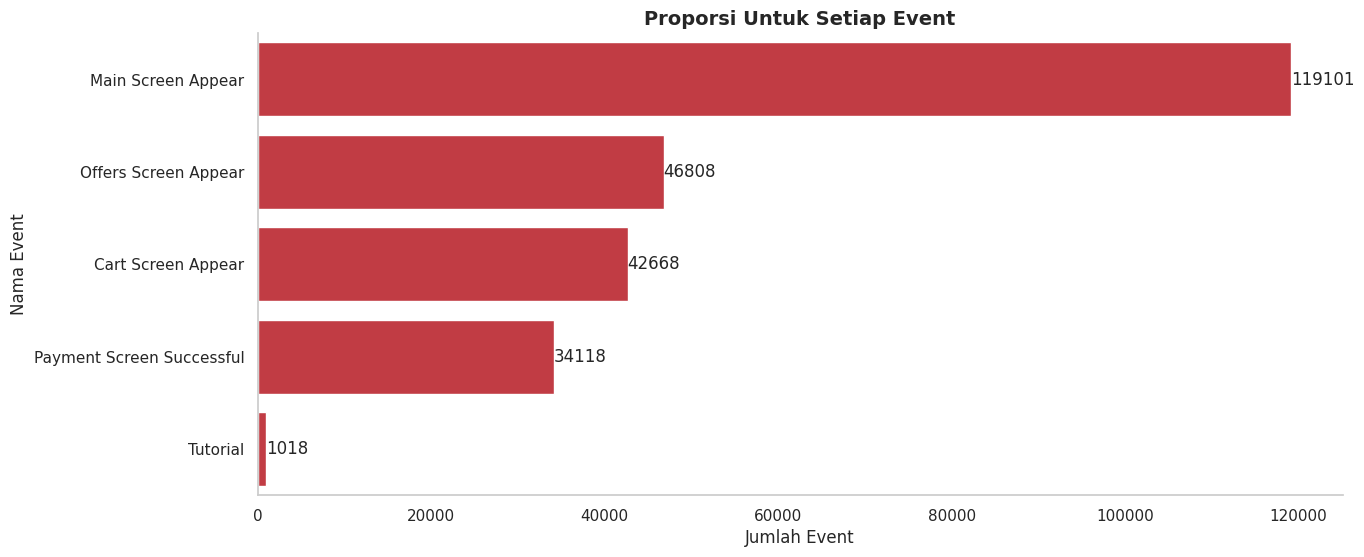

In [17]:
# identifikasi jumlah peristiwa tercatat

numb_of_event = data.groupby('event_name')['user_id'].count().sort_values(ascending=False).reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='user_id', y='event_name', data=numb_of_event, color='#d72631')

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

plt.xlabel('Jumlah Event')
plt.ylabel('Nama Event')
ax.set_title('Proporsi Untuk Setiap Event', fontsize=14, fontweight='semibold')
sns.despine()  # Menghilangkan grid
plt.grid(False, axis='x')

plt.show()

**Kesimpulan :**

* **MainScreenAppear**: Terdapat 119.101 kali ketika pengguna mengakses atau melihat halaman utama aplikasi atau situs web
* **OffersScreenAppear**: Terdapat 46.808 kali ketika pengguna mengakses halaman yang menampilkan penawaran produk atau layanan
* **CartScreenAppear**: Terdapat 42.668 kali ketika pengguna mengakses halaman yang menampilkan daftar produk yang ditambahkan ke keranjang belanja
* **PaymentScreenSuccessful**: Terdapat 34.118 kali ketika pengguna berhasil menyelesaikan proses pembayaran dan menampilkan halaman konfirmasi pembayaran yang sukses
* **Tutorial**: Terdapat 1.018 kali ketika pengguna mengakses laman tutorial yang tersedia dalam aplikasi atau situs web tersebut

## **Identifikasi Jumlah Pengguna Tercatat**

In [18]:
# Identifikasi jumlah pengguna unik

print('Jumlah pengguna unik adalah sebanyak {} pengguna'.format(data['user_id'].nunique()))

Jumlah pengguna unik adalah sebanyak 7551 pengguna


In [19]:
# Menghitung jumlah sesi untuk setiap user_id
session_counts = data.groupby('user_id')['event_date'].count().sort_values().reset_index()
session_counts.columns = ['user_id', 'session_count']

# Mengidentifikasi user_id dengan sesi terbanyak
most_sessions = session_counts[session_counts['session_count'] == session_counts['session_count'].max()]

# Menampilkan user_id dengan sesi terbanyak dan jumlah sesinya
most_sessions_user_id = most_sessions['user_id'].values[0]
most_sessions_count = most_sessions['session_count'].values[0]
print("User_id dengan event terbanyak yaitu:", most_sessions_user_id, "dengan jumlah event sebanyak :", most_sessions_count,"kali")

User_id dengan event terbanyak yaitu: 6304868067479728361 dengan jumlah event sebanyak : 2307 kali


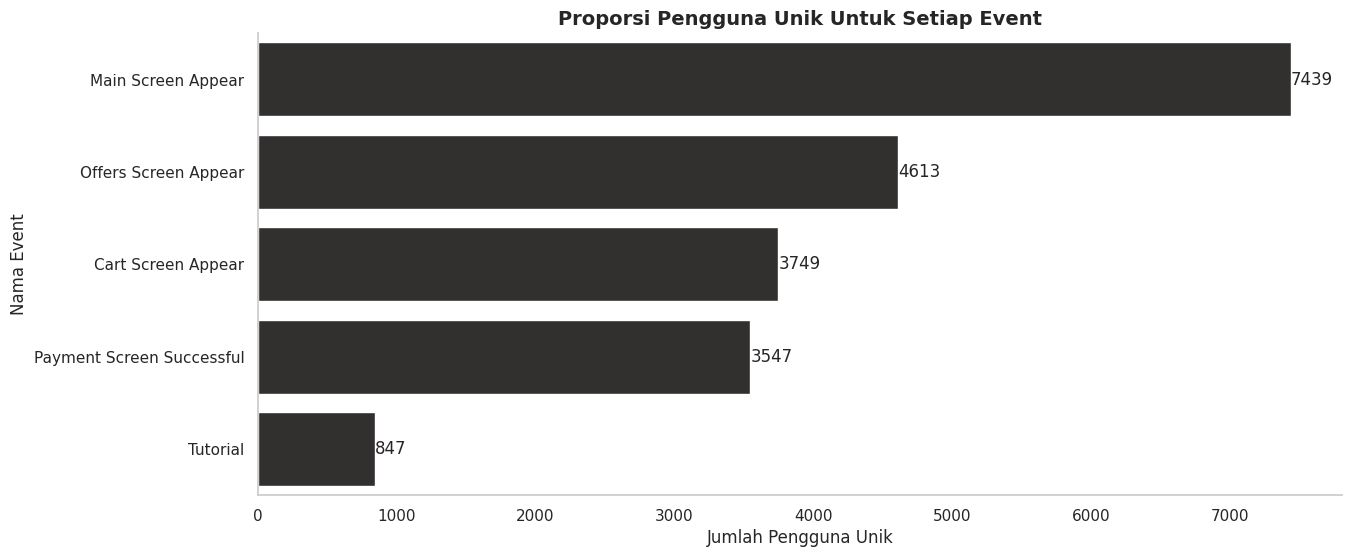

In [20]:
# identifikasi jumlah peristiwa tercatat per unique user

numb_of_event = data.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='user_id', y='event_name', data=numb_of_event, color='#322e2f')

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

plt.xlabel('Jumlah Pengguna Unik')
plt.ylabel('Nama Event')
ax.set_title('Proporsi Pengguna Unik Untuk Setiap Event', fontsize=14, fontweight='semibold')
sns.despine()  # Menghilangkan grid
plt.grid(False, axis='x')

plt.show()

**Kesimpulan :**

Sebanyak **47% pengguna** (3.547) berhasil mencapai tahap **konfirmasi proses pembayaran**

In [21]:
# Menghitung persentase pengguna untuk setiap jumlah peristiwa unik
pie_data = round(data.groupby('user_id', as_index=False).agg({'event_name': 'nunique'}).groupby('event_name')['user_id'].nunique() / data['user_id'].nunique(),2)
pie_data

event_name
1    0.36
2    0.14
3    0.04
4    0.40
5    0.06
Name: user_id, dtype: float64

/tmp/ipykernel_32/3894350261.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('gist_earth')(np.linspace(0, 1, num_colors))  # Memilih skema warna 'cool' dari matplotlib


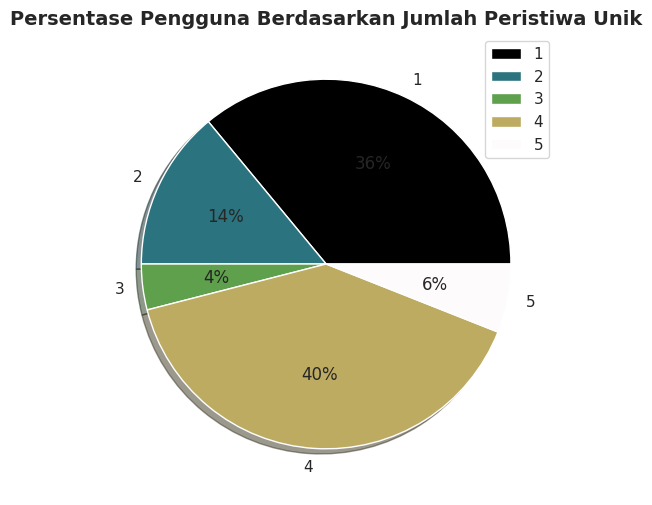

In [23]:
# Membuat gradasi warna
labels = pie_data.index
sizes = pie_data.values

num_colors = len(pie_data)  # Jumlah warna yang akan digunakan
colors = plt.cm.get_cmap('gist_earth')(np.linspace(0, 1, num_colors))  # Memilih skema warna 'cool' dari matplotlib
# Anda dapat mengganti 'cool' dengan skema warna lain yang tersedia di matplotlib

# Menampilkan pie chart dengan gradasi warna
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%.0f%%', shadow=True, colors=colors)
plt.title('Persentase Pengguna Berdasarkan Jumlah Peristiwa Unik', fontsize=14, fontweight='semibold')
plt.legend(labels, loc='best')

# Menampilkan pie chart
plt.show()

In [24]:
# identifikasi persentase pengguna yang melakukan seluruh perjalanan dari acara pertama hingga pembayaran

print(round((data.groupby('user_id', as_index=False).agg({'event_name': 'nunique'}).groupby('event_name')['user_id'].nunique() / data.user_id.nunique()) * 100, 1)[4],'%')

40.2 %


**Kesimpulan :**

Hanya **6% pengguna** yang berhasil melewati **kelima peristiwa** dengan **840 pengguna** melakukan **sesi tutorial**. Sementara itu **40% pengguna** berhasil melewati **4 peristiwa**. Ini mengindikasikan pencapaian yang cukup baik untuk aplikasi tersebut, mengingat jumlah pengguna yang berhasil melewati 4 peristiwa **lebih banyak** dibandingkan jumlah pengguna yang hanya masuk ke layar utama. **Grafik menunjukkan bahwa pengguna dapat melakukan pembelian secara langsung tanpa harus melewati urutan tahap.**

In [25]:
data[data['user_id'] == 9217594193087726423].sort_values('event_timestamp', ascending=True).head()

,event_name,user_id,event_timestamp,experiment_code,event_date
48912,Payment Screen Successful,9217594193087726423,2019-08-02 09:00:57,Control Group A,2019-08-02
48918,Cart Screen Appear,9217594193087726423,2019-08-02 09:00:58,Control Group A,2019-08-02
48930,Payment Screen Successful,9217594193087726423,2019-08-02 09:01:06,Control Group A,2019-08-02
48931,Cart Screen Appear,9217594193087726423,2019-08-02 09:01:06,Control Group A,2019-08-02
48933,Offers Screen Appear,9217594193087726423,2019-08-02 09:01:08,Control Group A,2019-08-02


In [26]:
# Identifikasi jumlah unik dari event_timestamp yang terjadi lebih dari sekali
repeated_events = data.groupby(['user_id', 'event_name'], as_index=False)['event_timestamp'].nunique().sort_values('event_timestamp', ascending=False)

# rasio jumlah unik user_id yang terlibat dalam peristiwa yang lebih dari satu kali terhadap jumlah keseluruhan user_id
repeated_events_ratio = round(repeated_events[repeated_events['event_timestamp'] > 1].groupby('event_name')['user_id'].nunique().sort_values(ascending=False) / data.groupby('event_name')['user_id'].nunique().sort_values(ascending=False), 2)
repeated_events_ratio

event_name
Main Screen Appear           0.97
Offers Screen Appear         0.85
Cart Screen Appear           0.87
Payment Screen Successful    0.84
Tutorial                     0.11
Name: user_id, dtype: float64

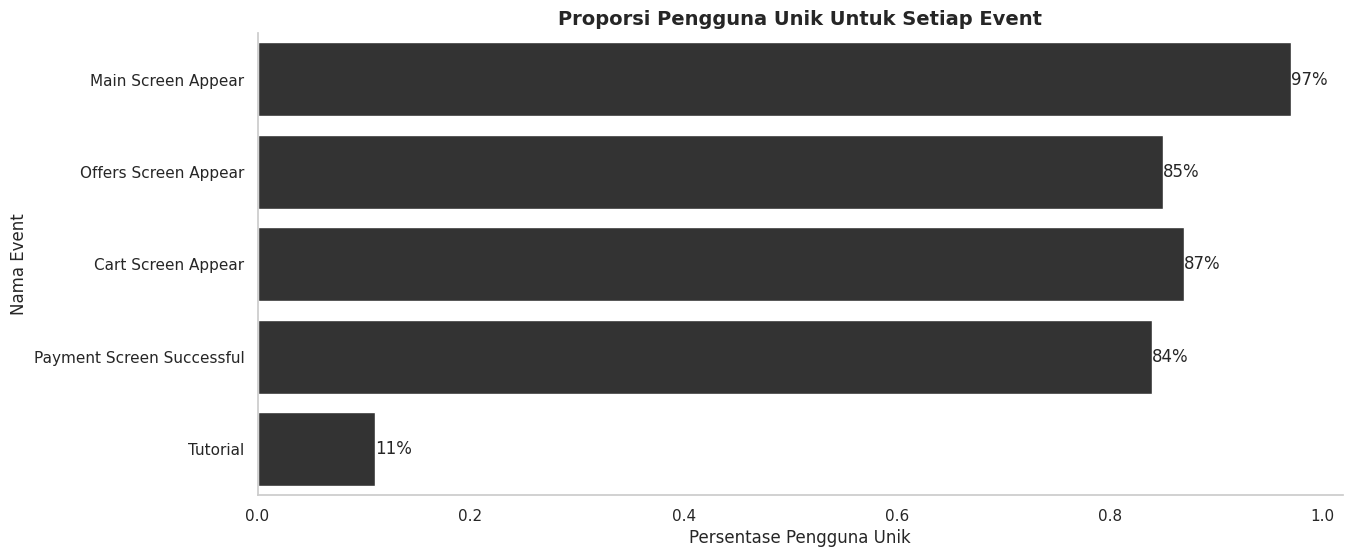

In [27]:
# Visualisasi pengunjung yang melakukan kunjungan berulang per event_name
repeated_events_viz = repeated_events_ratio.reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='user_id', y='event_name', data=repeated_events_viz, color='#333333')

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    percentage = bar.get_width() * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.0f}%', ha='left', va='center')

plt.xlabel('Persentase Pengguna Unik')
plt.ylabel('Nama Event')
ax.set_title('Proporsi Pengguna Unik Untuk Setiap Event', fontsize=14, fontweight='semibold')
sns.despine()  # Menghilangkan grid
plt.grid(False, axis='x')

plt.show()

**Kesimpulan :**

Dalam periode **13 hari** analisis sebanyak **84% pengguna** telah melakukan pembelian berulang

## **Identifikasi Jumlah Rata-Rata Peristiwa Per Pengguna**

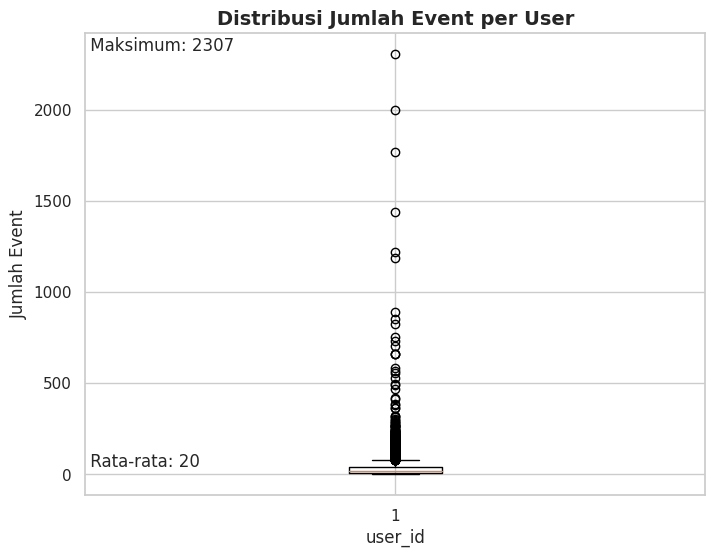

In [28]:
event_per_user = data.groupby('user_id').agg({'event_name':'count'})['event_name']

# Membuat grafik boxplot
event_per_user = event_per_user.reset_index()
plt.figure(figsize=(8, 6))
plt.boxplot(event_per_user['event_name'])
plt.xlabel('user_id')
plt.ylabel('Jumlah Event')
plt.title('Distribusi Jumlah Event per User', fontsize=14, fontweight='semibold')

# Menambahkan tanda anak panah untuk nilai rata-rata
median_value = np.median(event_per_user['event_name'])
plt.annotate(f' Rata-rata: {median_value:.0f}', xy=(0.5, median_value), xytext=(0.5, median_value + 20),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Menambahkan tanda anak panah untuk nilai maksimum
max_value = np.max(event_per_user['event_name'])
plt.annotate(f' Maksimum: {max_value:.0f}', xy=(0.5, max_value), xytext=(0.5, max_value + 20),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

In [29]:
# identifikasi jumlah rata-rata peristiwa per pengguna
event_per_user = data.groupby('user_id').agg({'event_name':'count'})['event_name']

# rata-rata peristiwa per jam untuk pengguna dengan jumlah peristiwa maksimum
days, hour, user_event_max = 13, 24, event_per_user.max()
user_event_per_hour = (user_event_max/days)/hour
print('Rata-rata peristiwa per jam untuk pengguna dengan jumlah sesi terbanyak: {:.0f}'.format(user_event_per_hour), 'kali perjam')

Rata-rata peristiwa per jam untuk pengguna dengan jumlah sesi terbanyak: 7 kali perjam


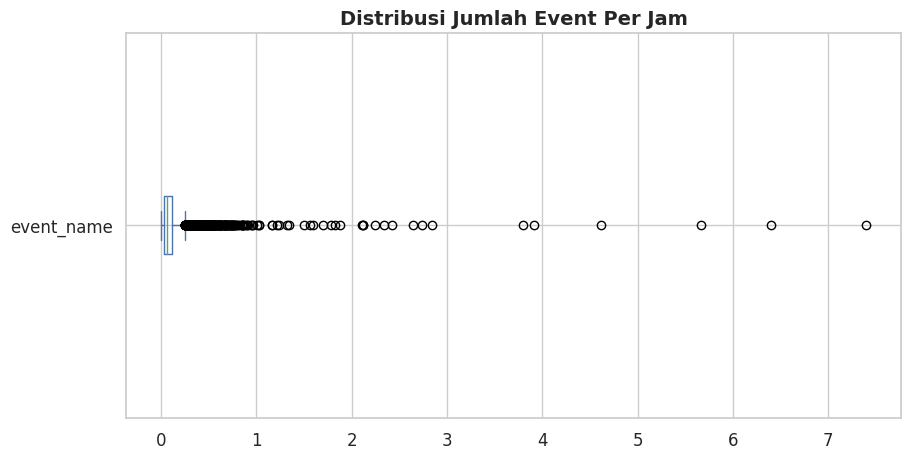

In [30]:
# Distribusi Jumlah Event Per Jam

user_event_per_hour = data.groupby('user_id').agg({'event_name': 'count'})['event_name']
days = 13
hour = 24
ax = user_event_per_hour.apply(lambda x: (x/days)/hour).plot.box(figsize=(10, 5), vert=False)

# Menambahkan judul
plt.title("Distribusi Jumlah Event Per Jam", fontsize=14, fontweight='semibold')

# Mengatur ukuran font
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Rata-rata jumlah peristiwa per pelanggan adalah **20 peristiwa**. Namun kami juga telah mengidentifikasi seorang pengguna dengan jumlah peristiwa sebanyak **2.307 peristiwa dalam 13 hari pengamatan** atau kurang lebih **7 peristiwa per jam** yang cukup mustahil menimbang perusahaan kami bergerak di sektor produk-produk makanan

In [31]:
# identifikasi outlier
event_per_user = event_per_user.reset_index()
print(np.percentile(event_per_user['event_name'], [95, 99]))

[ 89.  200.5]


Sebanyak **95% pengguna** melakukan maksimal **90 peristiwa**, sedangkan **99% pengguna** membuat maksimal **200 peristiwa** selama periode analisis. Kami memiliki bukti yang kuat untuk mengklasifikasikan pengguna yang memiliki total peristiwa tercatat **lebih dari 201** sebagai **outlier**.

## **Identifikasi Distribusi Jumlah Peristiwa Per Periode**

Sebelumnya, kami telah mengidentifikasi rentang tanggal minimum dan maksimum data yang kami miliki. Selanjutnya, kami akan mengamati pola distribusi peristiwa yang terjadi dalam setiap periode waktu yang tercakup oleh data. Kami akan memastikan bahwa data yang tersedia setara untuk seluruh periode tersebut. Beberapa peristiwa masa lalu mungkin terdapat dalam log pengguna karena alasan teknis, dan hal ini dapat memengaruhi distribusi keseluruhan data. Kami hanya akan menggunakan data saat kami yakin data tersebut sudah lengkap dan mengabaikan data lama yang tidak relevan. Kami akan mencoba menjawab beberapa pertanyaan berikut ini:

* Periode waktu mana yang sebenarnya diwakili oleh data yang kami miliki?
* Apakah kami kehilangan banyak peristiwa dan pengguna ketika kami mengabaikan data lama tersebut?
* Apakah kami memastikan bahwa data tersebut masih mencakup pengguna dari ketiga kelompok eksperimen?

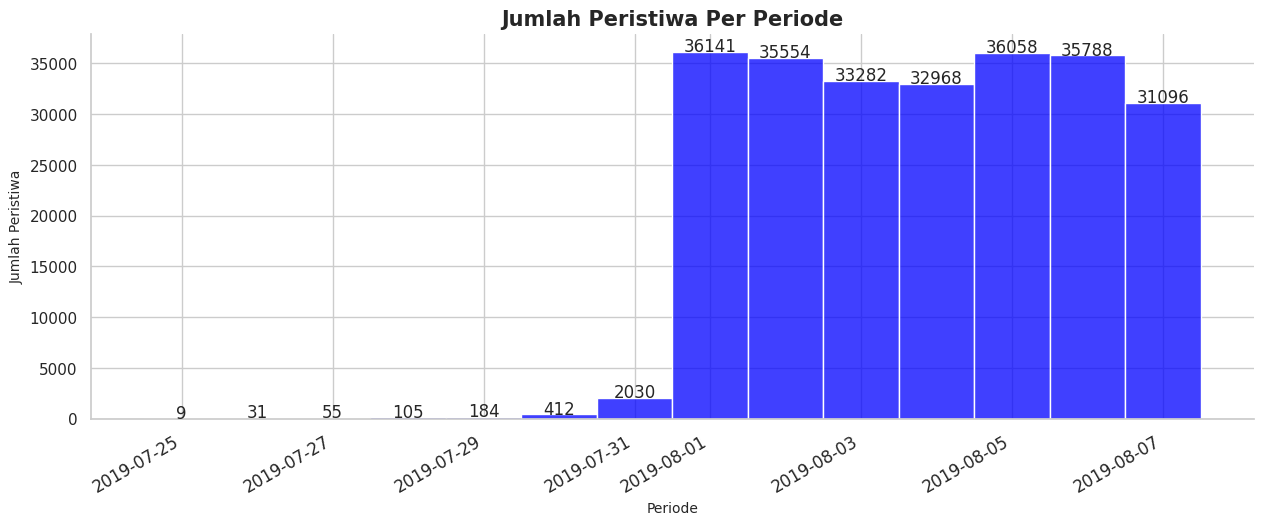

In [32]:
# memvisualisasikan pola distribusi data

plt.figure(figsize=(15, 5))
hist = sns.histplot(x=data['event_timestamp'].dt.date, color='blue')
plt.xticks(rotation=30, fontsize=12, ha='right')

sns.despine()
plt.xlabel('Periode', size=10)
plt.ylabel('Jumlah Peristiwa', size=10)
plt.title('Jumlah Peristiwa Per Periode', fontsize=15, fontweight='semibold')
for p in hist.patches:
    hist.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha="center", va="center",
                  size=12,
                  xytext=(0, 4),
                  textcoords='offset points')

plt.show()

Analisa kami berada pada rentang periode **2019-07-25** hingga **2019-08-07** (13 hari). Kami mengamati bahwa data-data untuk periode yang lebih lama mengakibatkan distribusi jumlah peristiwa dari seluruh pengguna **menjadi tidak merata**. Dengan mempertimbangkan distribusi data, maka kami akan mempersempit periode analisa hanya untuk rentang periode **2019-08-01** hingga **2019-08-07**

In [33]:
# membuat variabel baru yang berisi periode waktu yang relvan

data_fil = data.query('event_timestamp >= "2019-08-01 00:00"')
data_fil

,event_name,user_id,event_timestamp,experiment_code,event_date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,Control Group A,2019-08-01
2829,Main Screen Appear,3737462046622621720,2019-08-01 00:08:00,Control Group A,2019-08-01
2830,Main Screen Appear,3737462046622621720,2019-08-01 00:08:55,Control Group A,2019-08-01
2831,Offers Screen Appear,3737462046622621720,2019-08-01 00:08:58,Control Group A,2019-08-01
2832,Main Screen Appear,1433840883824088890,2019-08-01 00:08:59,Control Group B,2019-08-01
...,...,...,...,...,...
244121,Main Screen Appear,4599628364049201812,2019-08-07 21:12:25,Control Group B,2019-08-07
244122,Main Screen Appear,5849806612437486590,2019-08-07 21:13:59,Control Group A,2019-08-07
244123,Main Screen Appear,5746969938801999050,2019-08-07 21:14:43,Control Group A,2019-08-07
244124,Main Screen Appear,5746969938801999050,2019-08-07 21:14:58,Control Group A,2019-08-07


In [34]:
# menghitung persentase data yang hilang antara dataframe asli dan dataframe filter

print('Jumlah baris data dari dataframe asli:', '{:,}'.format(len(data)),'baris data')
print('Jumlah baris data dari dataframe yang difilter:', '{:,}'.format(len(data_fil)),'baris data')
print('Persentase data yang hilang:', '{:.2%}'.format(1-(len(data_fil)/len(data))))

Jumlah baris data dari dataframe asli: 243,713 baris data
Jumlah baris data dari dataframe yang difilter: 240,887 baris data
Persentase data yang hilang: 1.16%


In [35]:
# menghitung persentase jumlah pengguna unik yang hilang

print('Jumlah pengguna dari dataframe asli:', '{:,}'.format(data['user_id'].nunique()),'pengguna')
print('Jumlah pengguna dari dataframe yang difilter:', '{:,}'.format(data_fil['user_id'].nunique()),'pengguna')
print('Persentase pengguna yang hilang:', '{:.2%}'.format(1- (data_fil['user_id'].nunique()/data['user_id'].nunique())))

Jumlah pengguna dari dataframe asli: 7,551 pengguna
Jumlah pengguna dari dataframe yang difilter: 7,534 pengguna
Persentase pengguna yang hilang: 0.23%


In [36]:
# Identifikasi jumlah data untuk setiap kelompok eksperimen

data_fil['experiment_code'].value_counts(normalize=True)

experiment_code
Test Group         0.351048
Control Group A    0.329208
Control Group B    0.319743
Name: proportion, dtype: float64

Dengan rendahnya **tingkat persentase peristiwa dan pengguna yang hilang** dari dataframe yang baru, kami dapat memastikan hasil analisa kami **tidak akan terdistorsi** bahkan setelah kami mempersempit periode analisa. Selain itu kami juga telah memastikan bahwa data tersebut **masih mencakup** pengguna dari ketiga kelompok eksperimen.

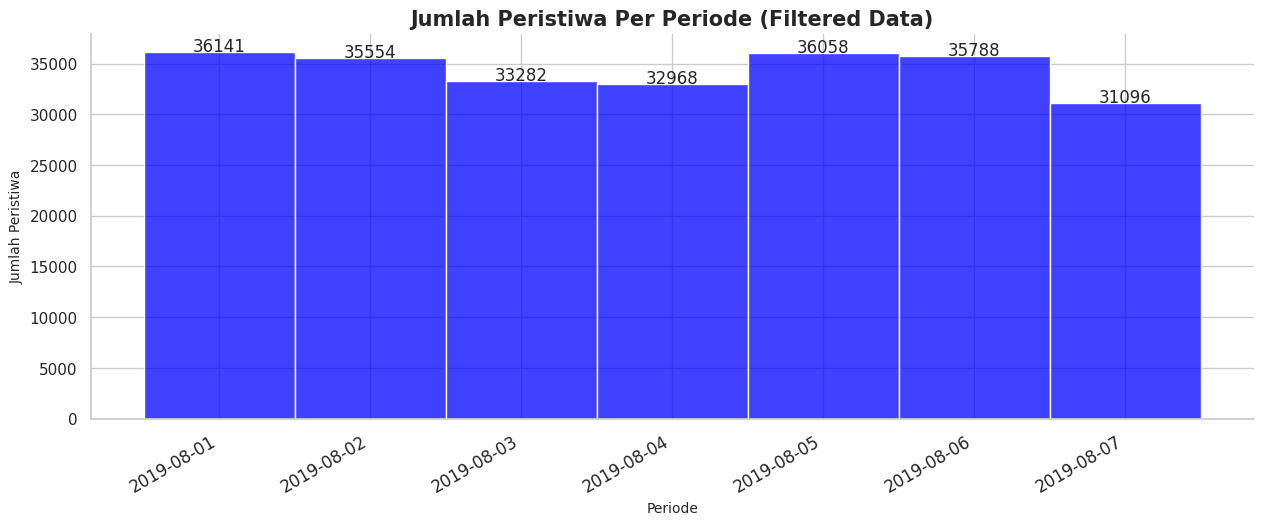

In [37]:
# memvisualisasikan pola distribusi data yang telah difilter

plt.figure(figsize=(15, 5))
hist = sns.histplot(x=data_fil['event_timestamp'].dt.date, color='blue')
plt.xticks(rotation=30, fontsize=12, ha='right')

sns.despine()
plt.xlabel('Periode', size=10)
plt.ylabel('Jumlah Peristiwa', size=10)
plt.title('Jumlah Peristiwa Per Periode (Filtered Data)', fontsize=15, fontweight='semibold')
for p in hist.patches:
    hist.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha="center", va="center",
                  size=12,
                  xytext=(0, 4),
                  textcoords='offset points')

plt.show()

In [38]:
# identifikasi jumlah rata-rata peristiwa per pengguna

event_per_user_fil = data_fil.groupby('user_id').agg({'event_name':'count'})['event_name'].reset_index()
event_per_user_fil

,user_id,event_name
0,6888746892508752,1
1,6909561520679493,5
2,6922444491712477,47
3,7435777799948366,6
4,7702139951469979,137
...,...,...
7529,9217594193087726423,9
7530,9219463515465815368,17
7531,9220879493065341500,6
7532,9221926045299980007,7


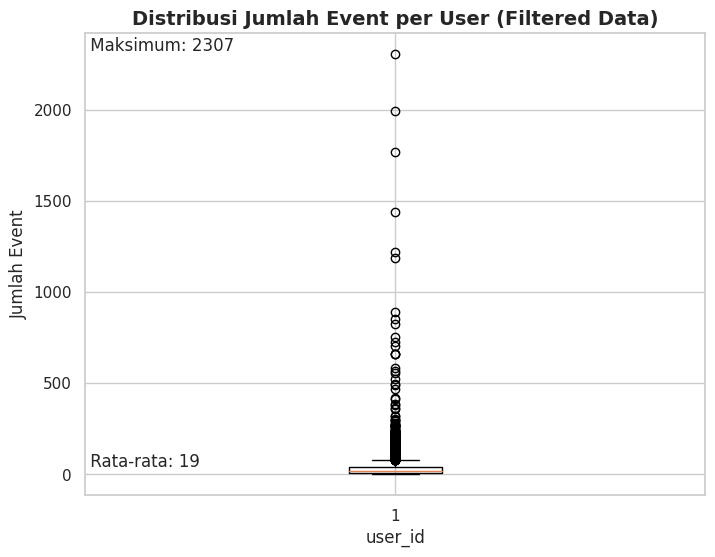

In [39]:
# Membuat grafik boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(event_per_user_fil['event_name'])
plt.xlabel('user_id')
plt.ylabel('Jumlah Event')
plt.title('Distribusi Jumlah Event per User (Filtered Data)', fontsize=14, fontweight='semibold')

# Menambahkan tanda anak panah untuk nilai rata-rata
median_value = np.median(event_per_user_fil['event_name'])
plt.annotate(f' Rata-rata: {median_value:.0f}', xy=(0.5, median_value), xytext=(0.5, median_value + 20),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Menambahkan tanda anak panah untuk nilai maksimum
max_value = np.max(event_per_user_fil['event_name'])
plt.annotate(f' Maksimum: {max_value:.0f}', xy=(0.5, max_value), xytext=(0.5, max_value + 20),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

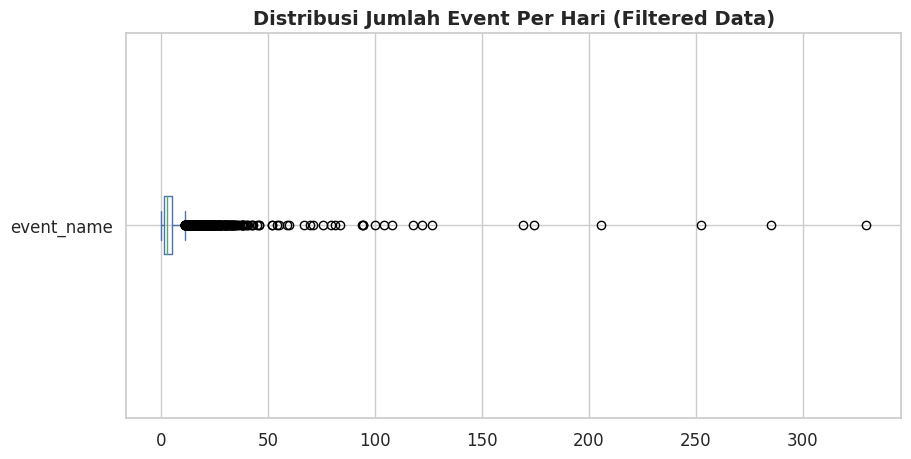

In [40]:
user_event_per_day_fil = data.groupby('user_id').agg({'event_name': 'count'})['event_name']
days = 7
hour = 24
ax = user_event_per_day_fil.apply(lambda x: (x/days)).plot.box(figsize=(10, 5), vert=False)

# Menambahkan judul
plt.title("Distribusi Jumlah Event Per Hari (Filtered Data)", fontsize=14, fontweight='semibold')

# Mengatur ukuran font
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [41]:
# identifikasi batas untuk quantile 0.99
user_event_per_day_fil.quantile(.99) / (7 * 24), user_event_per_day_fil.quantile(.99)

(1.193452380952381, 200.5)

Setelah memfilter data, nilai rata-rata jumlah peristiwa per pengguna yang semula bernilai 20 menurun menjadi sekitar 19 peristiwa/pengguna. Namun, kami masih menemukan jumlah even yang terbilang mustahil dengan lebih dari **201 kali event per hari dalam 7 hari periode analisa**. Dengan pertimbangan outlier pada data, kami memutuskan untuk memfilter hanya pada **99% data yang relevan** (percentile 99% = 201 peristiwa per user)

In [42]:
# identifikasi list user dengan jumlah peristiwa lebih dari 89 sesi
user_with_over201_event = list(user_event_per_day_fil[user_event_per_day_fil > user_event_per_day_fil.quantile(.99)].index)

# menghitung kontribusi user dengan jumlah sesi lebih dari 89 kali terhadap seluruh event tercatat
user_with_over201_event = data_fil.query("user_id in @user_with_over201_event")
user_outlier_list = list(user_with_over201_event['user_id'].unique())

print('Jumlah pengguna dengan jumlah sesi lebih dari 201 kali :', user_with_over201_event['user_id'].nunique(), 'pengguna')
print('Persentase pengguna dengan jumlah sesi ekstrem terhadap seluruh pengguna: {:.2f}'.format((len(user_with_over201_event) / len(data_fil)) * 100), '%')

Jumlah pengguna dengan jumlah sesi lebih dari 201 kali : 76 pengguna
Persentase pengguna dengan jumlah sesi ekstrem terhadap seluruh pengguna: 14.23 %


Hasil analisa kami menunjukkan sebanyak **76 pengguna** mampu berkontribusi terhadap **14.23% dari keseluruhan peristiwa tercatat**. Menahan outlier yang ekstrem semacam ini dapat mendistorsi keseluruhan hasil analisa

In [43]:
# membuat dataframe baru yang telah dibersihkan
data_final = data_fil[~data_fil['user_id'].isin(user_outlier_list)]
data_final

,event_name,user_id,event_timestamp,experiment_code,event_date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,Control Group A,2019-08-01
2829,Main Screen Appear,3737462046622621720,2019-08-01 00:08:00,Control Group A,2019-08-01
2830,Main Screen Appear,3737462046622621720,2019-08-01 00:08:55,Control Group A,2019-08-01
2831,Offers Screen Appear,3737462046622621720,2019-08-01 00:08:58,Control Group A,2019-08-01
2832,Main Screen Appear,1433840883824088890,2019-08-01 00:08:59,Control Group B,2019-08-01
...,...,...,...,...,...
244121,Main Screen Appear,4599628364049201812,2019-08-07 21:12:25,Control Group B,2019-08-07
244122,Main Screen Appear,5849806612437486590,2019-08-07 21:13:59,Control Group A,2019-08-07
244123,Main Screen Appear,5746969938801999050,2019-08-07 21:14:43,Control Group A,2019-08-07
244124,Main Screen Appear,5746969938801999050,2019-08-07 21:14:58,Control Group A,2019-08-07


# **Tahap 4. Analisis Funnel (Event)**

1. Analisis Frekuensi Kemunculan Dari Seluruh Peristiwa
2. Analisis Frekuensi Terjadinya Peristiwa Untuk Setiap Pengguna

## **Analisis Frekuensi Kemunculan Dari Seluruh Peristiwa (Event) Pada Log**

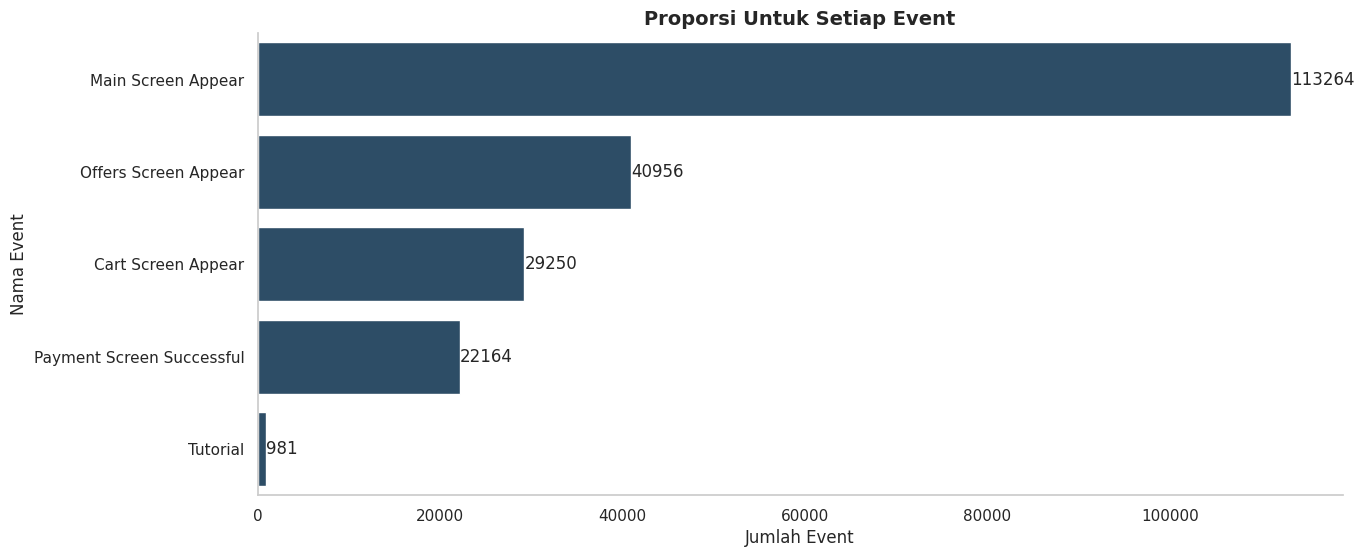

In [44]:
# identifikasi frekuensi kemunculan dari setiap peristiwa

numb_of_event = data_final.groupby('event_name')['user_id'].count().sort_values(ascending=False).reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='user_id', y='event_name', data=numb_of_event, color='#234E70')

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

plt.xlabel('Jumlah Event')
plt.ylabel('Nama Event')
ax.set_title('Proporsi Untuk Setiap Event', fontsize=14, fontweight='semibold')
sns.despine()  # Menghilangkan grid
plt.grid(False, axis='x')

plt.show()

Hasil analisis menunjukkan bahwa frekuensi setiap kegiatan telah sesuai dengan saluran pembelian yang ideal dilakukan oleh pengguna didalam website perusahaan

In [45]:
# Jumlah sesi yang dibuat oleh pengguna per event name

numb_of_event_pivot = data_final.pivot_table(index='event_name',values='user_id',aggfunc='count').sort_values('user_id')
numb_of_event_pivot = numb_of_event_pivot[numb_of_event_pivot.index != 'Tutorial'].sort_values('user_id', ascending=False).reset_index()
numb_of_event_pivot['percentage'] = round((numb_of_event_pivot['user_id'] / numb_of_event_pivot.loc[0, 'user_id']) * 100,2)
numb_of_event_pivot

,event_name,user_id,percentage
0,Main Screen Appear,113264,100.00
1,Offers Screen Appear,40956,36.16
2,Cart Screen Appear,29250,25.82
3,Payment Screen Successful,22164,19.57


In [46]:
# Memvisualisasikan funnel chart

fig = go.Figure(go.Funnel(
    y = numb_of_event_pivot['event_name'],
    x = numb_of_event_pivot['user_id'],
    marker = {"color": ["#FFA15A", "#FFC65A", "#FFD97A", "#FFEEA6"]}
))

fig.update_layout(
    title="Frekuensi Terjadinya Peristiwa",
    yaxis_title="Event Name",
    xaxis_title="Number of Event",
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [47]:
# menambahkan kolom baru kedataset

numb_of_event_pivot['Percentage_change'] = numb_of_event_pivot['user_id'].pct_change() * 100
numb_of_event_pivot

,event_name,user_id,percentage,Percentage_change
0,Main Screen Appear,113264,100.00,NaN
1,Offers Screen Appear,40956,36.16,-63.840232
2,Cart Screen Appear,29250,25.82,-28.581893
3,Payment Screen Successful,22164,19.57,-24.225641


Dari sekitar **114.000 sesi** yang dilakukan oleh pengguna saat mengakses halaman utama situs web perusahaan, hanya sekitar **36% dari keseluruhan sesi** tersebut yang melanjutkan untuk **menjelajahi penawaran produk** dari perusahaan. Dalam 36% itu, lebih dari **70% sesi** berhasil **menambahkan barang ke keranjang** setelah melihat penawaran perusahaan. Pada akhirnya, sekitar **76% dari sesi pengguna sebelumnya** berhasil melakukan pembelian. Secara umum, kami menemukan bahwa hanya sekitar **20% dari sesi** yang dibuat oleh pengguna yang **memutuskan untuk melakukan pembelian**

## **Analisis Frekuensi Terjadinya Peristiwa Untuk Setiap Pengguna**

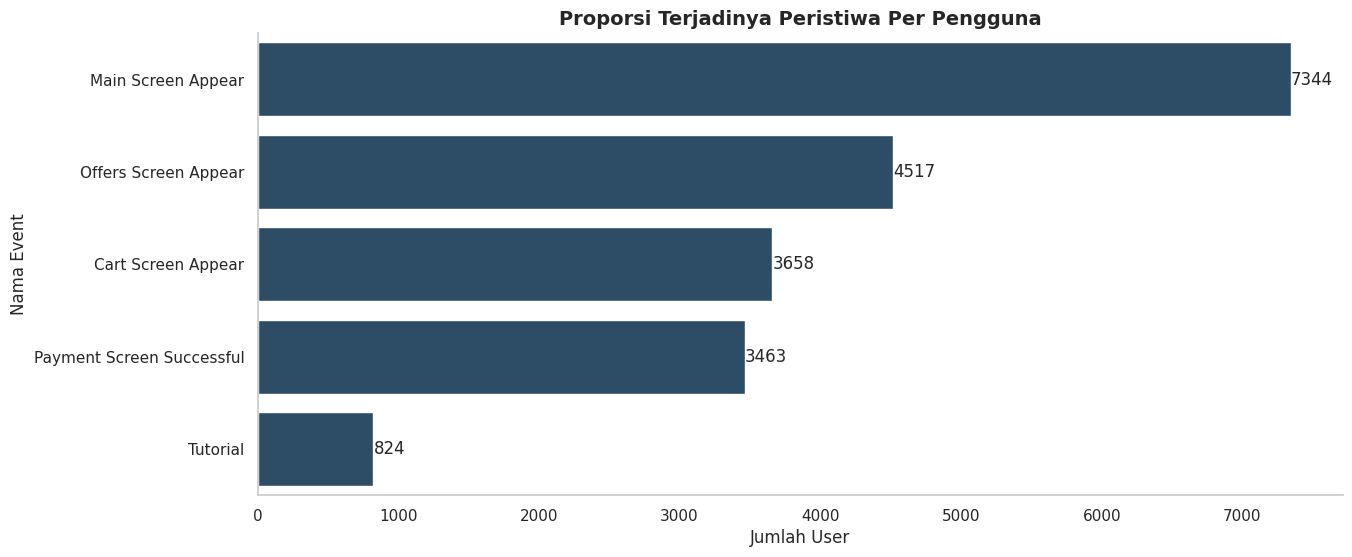

In [48]:
# identifikasi frekuensi kemunculan peristiwa untuk setiap pengguna

numb_of_user_event = data_final.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='user_id', y='event_name', data=numb_of_user_event, color='#234E70')

# Menambahkan anotasi untuk setiap bar chart
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', ha='left', va='center')

plt.xlabel('Jumlah User')
plt.ylabel('Nama Event')
ax.set_title('Proporsi Terjadinya Peristiwa Per Pengguna', fontsize=14, fontweight='semibold')
sns.despine()  # Menghilangkan grid
plt.grid(False, axis='x')

plt.show()

In [49]:
# Jumlah pengguna yang terlibat untuk setiap event name

numb_of_user_event_pivot = data_final.pivot_table(index='event_name',values='user_id',aggfunc='nunique').sort_values('user_id')
numb_of_user_event_pivot = numb_of_user_event_pivot[numb_of_user_event_pivot.index != 'Tutorial'].sort_values('user_id', ascending=False).reset_index()
numb_of_user_event_pivot['percentage'] = (numb_of_user_event_pivot['user_id'] / numb_of_user_event_pivot.loc[0, 'user_id']) * 100
numb_of_user_event_pivot

,event_name,user_id,percentage
0,Main Screen Appear,7344,100.000000
1,Offers Screen Appear,4517,61.505991
2,Cart Screen Appear,3658,49.809368
3,Payment Screen Successful,3463,47.154139


In [50]:
# Memvisualisasikan funnel chart

fig = go.Figure(go.Funnel(
    y =numb_of_user_event_pivot['event_name'],
    x = numb_of_user_event_pivot['user_id'],
    marker = {"color": ["#FFA15A", "#FFC65A", "#FFD97A", "#FFEEA6"]}
))

fig.update_layout(
    title="Frekuensi Terjadinya Peristiwa Untuk Setiap Pengguna Unik",
    yaxis_title="Event Name",
    xaxis_title="Number of Users",
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [51]:
# menambahkan kolom baru kedataset

numb_of_user_event_pivot['Percentage_change'] = numb_of_user_event_pivot['user_id'].pct_change() * 100
numb_of_user_event_pivot

,event_name,user_id,percentage,Percentage_change
0,Main Screen Appear,7344,100.000000,NaN
1,Offers Screen Appear,4517,61.505991,-38.494009
2,Cart Screen Appear,3658,49.809368,-19.017047
3,Payment Screen Successful,3463,47.154139,-5.330782


Sebanyak 62% dari pengguna melanjutkan untuk melihat laman penawaran produk dari perusahaan. Ini menunjukkan bahwa hampir sebagian pengguna mengalami kehilangan minat atau keluar sebelum melihat tawaran yang ditampilkan. Setelah melihat tawaran, hanya 50% pengguna yang melanjutkan ke laman keranjang. Mungkin ada faktor lain yang membuat pengguna tidak melanjutkan dari laman penawaran produk perusahaan ke laman keranjang. Akhirnya, dari mereka yang mencapai laman pembayaran, hanya 47% yang berhasil menyelesaikan pembayaran. Hal ini menunjukkan adanya hambatan atau masalah yang mungkin timbul selama proses pembayaran yang menghalangi sebagian pengguna untuk menyelesaikan transaksi

In [52]:
data_final

,event_name,user_id,event_timestamp,experiment_code,event_date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,Control Group A,2019-08-01
2829,Main Screen Appear,3737462046622621720,2019-08-01 00:08:00,Control Group A,2019-08-01
2830,Main Screen Appear,3737462046622621720,2019-08-01 00:08:55,Control Group A,2019-08-01
2831,Offers Screen Appear,3737462046622621720,2019-08-01 00:08:58,Control Group A,2019-08-01
2832,Main Screen Appear,1433840883824088890,2019-08-01 00:08:59,Control Group B,2019-08-01
...,...,...,...,...,...
244121,Main Screen Appear,4599628364049201812,2019-08-07 21:12:25,Control Group B,2019-08-07
244122,Main Screen Appear,5849806612437486590,2019-08-07 21:13:59,Control Group A,2019-08-07
244123,Main Screen Appear,5746969938801999050,2019-08-07 21:14:43,Control Group A,2019-08-07
244124,Main Screen Appear,5746969938801999050,2019-08-07 21:14:58,Control Group A,2019-08-07


# **Tahap 5. Analisis Eksperimental**

1. Mengidentifikasi jumlah pengguna yang ada di setiap kelompok
2. Analisis Perbedaan Statistik (A/A Testing) pada 2 Kelompok Kontrol
    * Visualisasi Sesi/Peristiwa Per Pengguna Per Periode
    * Membuat Fungsi Untuk Mempelajari Perbedaan Statistik Antar Kelompok Eksperimen
        * Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Main Screen Appear
        * Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Offers Screen Appear
        * Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Cart Screen Appear
        * Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Payment Screen Successful
        * Uji Perbedaan Statistik : Tingkat Konversi Pembelian

## **Mengidentifikasi Jumlah Pengguna Yang Ada Di Setiap Kelompok**

In [53]:
# menambahkan variabel baru kedalam dataframe

data_final['event_day'] = data_final['event_timestamp'].dt.date
data_final['event_hour'] = data_final['event_timestamp'].dt.hour
data_final['event_dayhour'] = pd.to_datetime(data_final['event_day']) + pd.to_timedelta(data_final.event_hour, unit='h')
data_final

/tmp/ipykernel_32/2339069862.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/2339069862.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/2339069862.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,event_name,user_id,event_timestamp,experiment_code,event_date,event_day,event_hour,event_dayhour
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,Control Group A,2019-08-01,2019-08-01,0,2019-08-01 00:00:00
2829,Main Screen Appear,3737462046622621720,2019-08-01 00:08:00,Control Group A,2019-08-01,2019-08-01,0,2019-08-01 00:00:00
2830,Main Screen Appear,3737462046622621720,2019-08-01 00:08:55,Control Group A,2019-08-01,2019-08-01,0,2019-08-01 00:00:00
2831,Offers Screen Appear,3737462046622621720,2019-08-01 00:08:58,Control Group A,2019-08-01,2019-08-01,0,2019-08-01 00:00:00
2832,Main Screen Appear,1433840883824088890,2019-08-01 00:08:59,Control Group B,2019-08-01,2019-08-01,0,2019-08-01 00:00:00
...,...,...,...,...,...,...,...,...
244121,Main Screen Appear,4599628364049201812,2019-08-07 21:12:25,Control Group B,2019-08-07,2019-08-07,21,2019-08-07 21:00:00
244122,Main Screen Appear,5849806612437486590,2019-08-07 21:13:59,Control Group A,2019-08-07,2019-08-07,21,2019-08-07 21:00:00
244123,Main Screen Appear,5746969938801999050,2019-08-07 21:14:43,Control Group A,2019-08-07,2019-08-07,21,2019-08-07 21:00:00
244124,Main Screen Appear,5746969938801999050,2019-08-07 21:14:58,Control Group A,2019-08-07,2019-08-07,21,2019-08-07 21:00:00


In [54]:
# identifikasi proporsi pengguna untuk setiap kelompok eksperimen

experiment_prop = round(data_final.groupby(['experiment_code']).agg({'user_id':'nunique'}).divide(data_final['user_id'].nunique()),3)
experiment_prop

,user_id
experiment_code,
Control Group A,0.329
Control Group B,0.334
Test Group,0.337


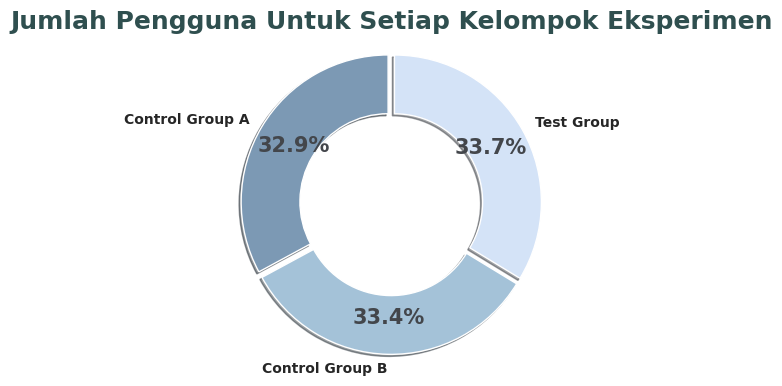

In [55]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

explode = (0.05, 0.05, 0.05)
patches, texts, autotexts = plt.pie(experiment_prop['user_id'],
    shadow=True,
    colors=['#7c99b4', '#a4c2d8', '#d4e3f7'],
    labels=experiment_prop.index,
    autopct='%1.1f%%',
    textprops={
        'fontsize': 10,
        'fontweight': 'bold'
    },
    wedgeprops=dict(width=0.8),
    explode=explode,
    startangle=90,
    pctdistance=0.75,
    radius=2.0)

for text in autotexts:
    text.set_fontsize(15)
    text.set_color('#43464b')
plt.title("Jumlah Pengguna Untuk Setiap Kelompok Eksperimen",
          pad=60,
          size=18,
          x=.5,
          fontweight='semibold',
          color='darkslategray',
          fontname='sans-serif')
plt.tight_layout()
plt.show()

Data menunjukkan bahwa jumlah pengguna untuk setiap kelompok eksperimen **terdistribusi secara merata**

## **Analisis Perbedaan Statistik (A/A Testing) Untuk Seluruh Kelompok Eksperiment**

### **Visualisasi Sesi/Peristiwa Per Pengguna Per Periode**

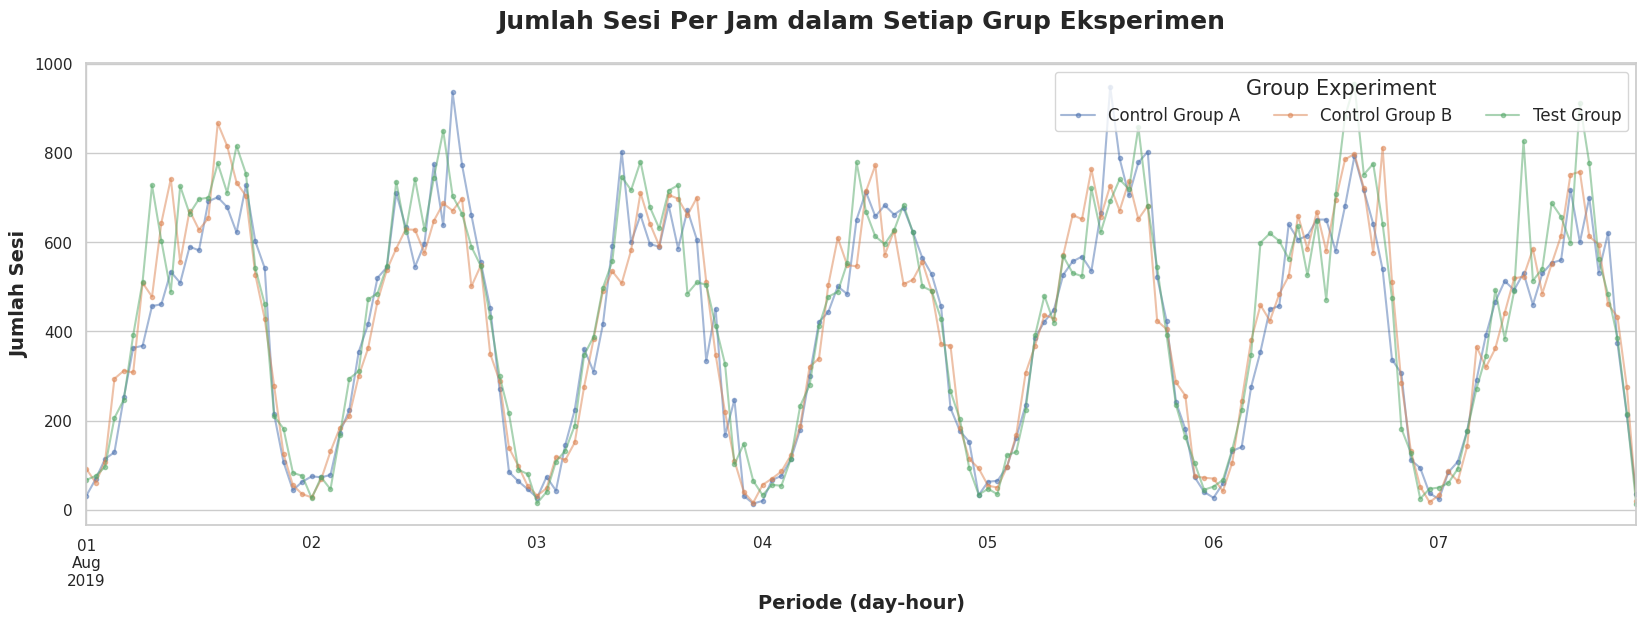

In [56]:
# identifikasi pola sesi yang dibuat oleh pengguna per periode dari seluruh kelompok eksperimen

fig, ax = plt.subplots(figsize=(20, 6))

data_final.groupby(['experiment_code', 'event_dayhour']).agg({'user_id': 'count'}).query("experiment_code == 'Control Group A'").reset_index('experiment_code')['user_id'].plot.line(style='.-', rot=0, alpha=0.5)
data_final.groupby(['experiment_code', 'event_dayhour']).agg({'user_id': 'count'}).query("experiment_code == 'Control Group B'").reset_index('experiment_code')['user_id'].plot.line(style='.-', rot=0, alpha=.5)
data_final.groupby(['experiment_code', 'event_dayhour']).agg({'user_id': 'count'}).query("experiment_code == 'Test Group'").reset_index('experiment_code')['user_id'].plot.line(style='.-', rot=0, alpha=.5)

plt.legend(['Control Group A', 'Control Group B', 'Test Group'], fontsize=12, ncol=5, title='Group Experiment', title_fontsize=15, loc='upper right')

plt.title('Jumlah Sesi Per Jam dalam Setiap Grup Eksperimen', pad=25, fontsize=18, fontweight='semibold')
plt.xlabel('Periode (day-hour)', fontsize=14, fontweight='semibold')
plt.ylabel('Jumlah Sesi', fontsize=14, fontweight='semibold')

plt.show()

Distribusi **jumlah sesi pengguna** yang terlibat per periode dari seluruh kelompok eksperimen menunjukkan **pola yang serupa** selama periode pengamatan (01 - 07 Agustus 2019). Puncak sesi terjadi selama tengah hari dan kemudian secara bertahap menurun membentuk **pola sinusoidal** untuk seluruh kelompok eksperimen

In [57]:
# membuat dataframe "period"
period = data_final[['event_day','experiment_code']].drop_duplicates()
period.sort_values('event_day', ascending=True)

# menghitung total sesi dan jumlah pengguna unik per periode dan per kelompok eksperimen
event_agg = (
    period
    .apply(lambda x: data_final[np.logical_and(data_final['event_day'] <= x['event_day'], data_final['experiment_code'] == x['experiment_code'])]
    .agg({'event_day' : 'max',
          'experiment_code' : 'max',
          'event_name' : 'count',
          'user_id' : 'nunique'}),
           axis=1)
    .sort_values(by=['event_day','experiment_code'])
)

# mengubah nama kolom
event_agg = event_agg.rename(columns={'experiment_code': 'experiment_group',
                                      'event_name': 'total_session',
                                      'user_id': 'total_unique_user'})
event_agg

,event_day,experiment_group,total_session,total_unique_user
2828,2019-08-01,Control Group A,9453,1173
2832,2019-08-01,Control Group B,10626,1264
2844,2019-08-01,Test Group,10815,1211
39058,2019-08-02,Control Group A,19654,1695
39093,2019-08-02,Control Group B,20015,1737
39073,2019-08-02,Test Group,21183,1675
74665,2019-08-03,Control Group A,28887,1943
74663,2019-08-03,Control Group B,29205,1996
74683,2019-08-03,Test Group,31012,1979
108036,2019-08-04,Control Group A,38300,2128


In [58]:
# membuat pivot table jumlah sesi berdasarkan periode harian dan group eksperimen

pivot_user_event = (pd.pivot_table(data_final,
                            values='user_id',
                            index=['event_day', 'experiment_code'],
                            columns=['event_name'],
                            aggfunc='count')
               .reset_index()
               .rename_axis('', axis=1)
              )

pivot_user_event

,event_day,experiment_code,Cart Screen Appear,Main Screen Appear,Offers Screen Appear,Payment Screen Successful,Tutorial
0,2019-08-01,Control Group A,1404,5167,1832,996,54
1,2019-08-01,Control Group B,1382,6099,2062,1003,80
2,2019-08-01,Test Group,1458,6145,2111,1018,83
3,2019-08-02,Control Group A,1588,5404,2019,1129,61
4,2019-08-02,Control Group B,1333,5097,1933,983,43
5,2019-08-02,Test Group,1412,5683,2211,1006,56
6,2019-08-03,Control Group A,1578,4435,1956,1216,48
7,2019-08-03,Control Group B,1369,4784,1947,1035,55
8,2019-08-03,Test Group,1468,5026,2192,1086,57
9,2019-08-04,Control Group A,1437,4904,1897,1134,41


In [60]:
# identifikasi tipe data

pivot_user_event.dtypes


event_day                    object
experiment_code              object
Cart Screen Appear            int64
Main Screen Appear            int64
Offers Screen Appear          int64
Payment Screen Successful     int64
Tutorial                      int64
dtype: object

In [67]:
# Konversi kolom event menjadi tipe data numerik
event_cols = ["Cart Screen Appear", "Main Screen Appear", "Offers Screen Appear", "Payment Screen Successful", "Tutorial"]
pivot_user_event[event_cols] = pivot_user_event[event_cols].apply(pd.to_numeric, errors='coerce')

# Menghitung jumlah kumulatif untuk setiap grup
cumsum_user_event = pivot_user_event.groupby('experiment_code')[event_cols].cumsum()

# Menambahkan kolom 'Total_Session'
cumsum_user_event['Total_Session'] = cumsum_user_event[event_cols].sum(axis=1)

# Menggabungkan kolom-kolom yang diperlukan dari kedua DataFrame
cumsum_user_event = pd.concat([pivot_user_event[['event_day', 'experiment_code']], cumsum_user_event], axis=1)
cumsum_user_event

,event_day,experiment_code,Cart Screen Appear,Main Screen Appear,Offers Screen Appear,Payment Screen Successful,Tutorial,Total_Session
0,2019-08-01,Control Group A,1404,5167,1832,996,54,9453
1,2019-08-01,Control Group B,1382,6099,2062,1003,80,10626
2,2019-08-01,Test Group,1458,6145,2111,1018,83,10815
3,2019-08-02,Control Group A,2992,10571,3851,2125,115,19654
4,2019-08-02,Control Group B,2715,11196,3995,1986,123,20015
5,2019-08-02,Test Group,2870,11828,4322,2024,139,21183
6,2019-08-03,Control Group A,4570,15006,5807,3341,163,28887
7,2019-08-03,Control Group B,4084,15980,5942,3021,178,29205
8,2019-08-03,Test Group,4338,16854,6514,3110,196,31012
9,2019-08-04,Control Group A,6007,19910,7704,4475,204,38300


### **Membuat Sejumlah Fungsi Untuk Mempelajari Perbedaan Statistik Antar Kelompok Eksperimen**

In [68]:
# Membuat fungsi untuk memvisualkan perbandingan jumlah sesi kumulatif (pilihan) per periode untuk setiap group

def create_area_chart(column, title, figsize):
    fig, ax = plt.subplots(figsize=figsize)

    experiment_codes = cumsum_user_event['experiment_code'].unique()

    for code in experiment_codes:
        data = cumsum_user_event[cumsum_user_event['experiment_code'] == code]
        ax.plot(data['event_day'], data[column], label=code)
        ax.fill_between(data['event_day'], data[column], alpha=0.5)

    ax.set_xlabel('Event Day', fontsize=15, fontweight='semibold')
    ax.set_ylabel(column, fontsize=15, fontweight='semibold')
    ax.set_title(title, pad=20, fontsize=20, fontweight='semibold')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [69]:
# Membuat fungsi untuk memvisualkan grafik perbedaan relatif untuk setiap kelompok eksperimen

def graph_difference_relative(event_name, pltx, plty):
    groupA1 = cumsum_user_event[cumsum_user_event['experiment_code']=='Control Group A'][['event_day', event_name]]
    groupA2 = cumsum_user_event[cumsum_user_event['experiment_code']=='Control Group B'][['event_day', event_name]]
    groupB = cumsum_user_event[cumsum_user_event['experiment_code']=='Test Group'][['event_day', event_name]]

    mergedCumulativeA = groupA1.merge(groupA2, left_on='event_day', right_on='event_day', how='left', suffixes =['A1', 'A2'])
    mergedCumulative = mergedCumulativeA.merge(groupB, left_on='event_day', right_on='event_day', how='left')

    columnA1 = event_name + 'A1'
    columnA2 = event_name + 'A2'
    xaxis = mergedCumulative['event_day']
    yaxis1 = mergedCumulative[event_name] / mergedCumulative[columnA1] -1
    yaxis2 = mergedCumulative[event_name] / mergedCumulative[columnA2] -1

    # Set the figure size
    plt.figure(figsize=(18, 4))

    # Plotting the data
    plt.plot(xaxis, yaxis1, label='Test Group Vs Control Group A')
    plt.plot(xaxis, yaxis2, label='Test Group Vs Control Group B')

    # Adding labels and title
    plt.xlabel('Event Day', fontsize=15, fontweight='semibold')
    plt.ylabel('Relative Difference', fontsize=15, fontweight='semibold')
    plt.title('Grafik Perbedaan Relatif Jumlah Sesi: ' + event_name,  pad=20, fontsize=20, fontweight='semibold')
    plt.axhline(y=pltx, color='black', linestyle='--')
    plt.axhline(y=plty, color='black', linestyle='--')
    plt.legend()

    # Displaying the graph
    plt.show()

In [70]:
# Fungsi untuk menganalisis perbedaan antar setiap kelompok eksperimen menggunakan Mann-Whitney U test

def mannwhitneyu_test(column):
    alpha = 0.05

    # Control Group A vs Control Group B
    group_a_data = pivot_user_event[pivot_user_event['experiment_code'] == 'Control Group A'][column]
    group_b_data = pivot_user_event[pivot_user_event['experiment_code'] == 'Control Group B'][column]

    stat, p_value = st.mannwhitneyu(group_a_data, group_b_data)
    print('p_value:', p_value.round(2))

    if p_value < alpha:
        print("Tolak Hipotesis Null: Terdapat perbedaan signifikan antara Control Group A vs Control Group B")
    else:
        print("Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Control Group B")
    print("Perbedaan Relatif antara 2 kelompok sebesar: {0:.3f}".format(group_b_data.mean() / group_a_data.mean() - 1))
    print()

    # Control Group A vs Test Group
    group_a_data = pivot_user_event[pivot_user_event['experiment_code'] == 'Control Group A'][column]
    test_group_data = pivot_user_event[pivot_user_event['experiment_code'] == 'Test Group'][column]

    stat, p_value = st.mannwhitneyu(group_a_data, test_group_data)
    print('p_value:', p_value.round(2))

    if p_value < alpha:
        print("Tolak Hipotesis Null: Terdapat perbedaan signifikan antara Control Group A vs Test Group")
    else:
        print("Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Test Group")
    print("Perbedaan Relatif antara 2 kelompok sebesar: {0:.3f}".format(test_group_data.mean() / group_a_data.mean() - 1))
    print()

    # Control Group B vs Test Group
    group_b_data = pivot_user_event[pivot_user_event['experiment_code'] == 'Control Group B'][column]
    test_group_data = pivot_user_event[pivot_user_event['experiment_code'] == 'Test Group'][column]

    stat, p_value = st.mannwhitneyu(group_b_data, test_group_data)
    print('p_value:', p_value.round(2))

    if p_value < alpha:
        print("Tolak Hipotesis Null: Terdapat perbedaan signifikan antara Control Group B vs Test Group")
    else:
        print("Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group B vs Test Group")

    print("Perbedaan Relatif antara 2 kelompok sebesar: {0:.3f}".format(test_group_data.mean() / group_b_data.mean() - 1))

#### **Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Main Screen Appear**

**Main Screen Appear** mengacu pada saat pengguna melihat atau mengakses tampilan utama aplikasi. Dalam analisis ini, jumlah sesi pengguna akan dibandingkan antar kelompok eksperimen. Hasil dari uji perbedaan statistik ini dapat memberikan pemahaman yang lebih baik tentang apakah perubahan pada tampilan font berdampak signifikan terhadap interaksi pengguna

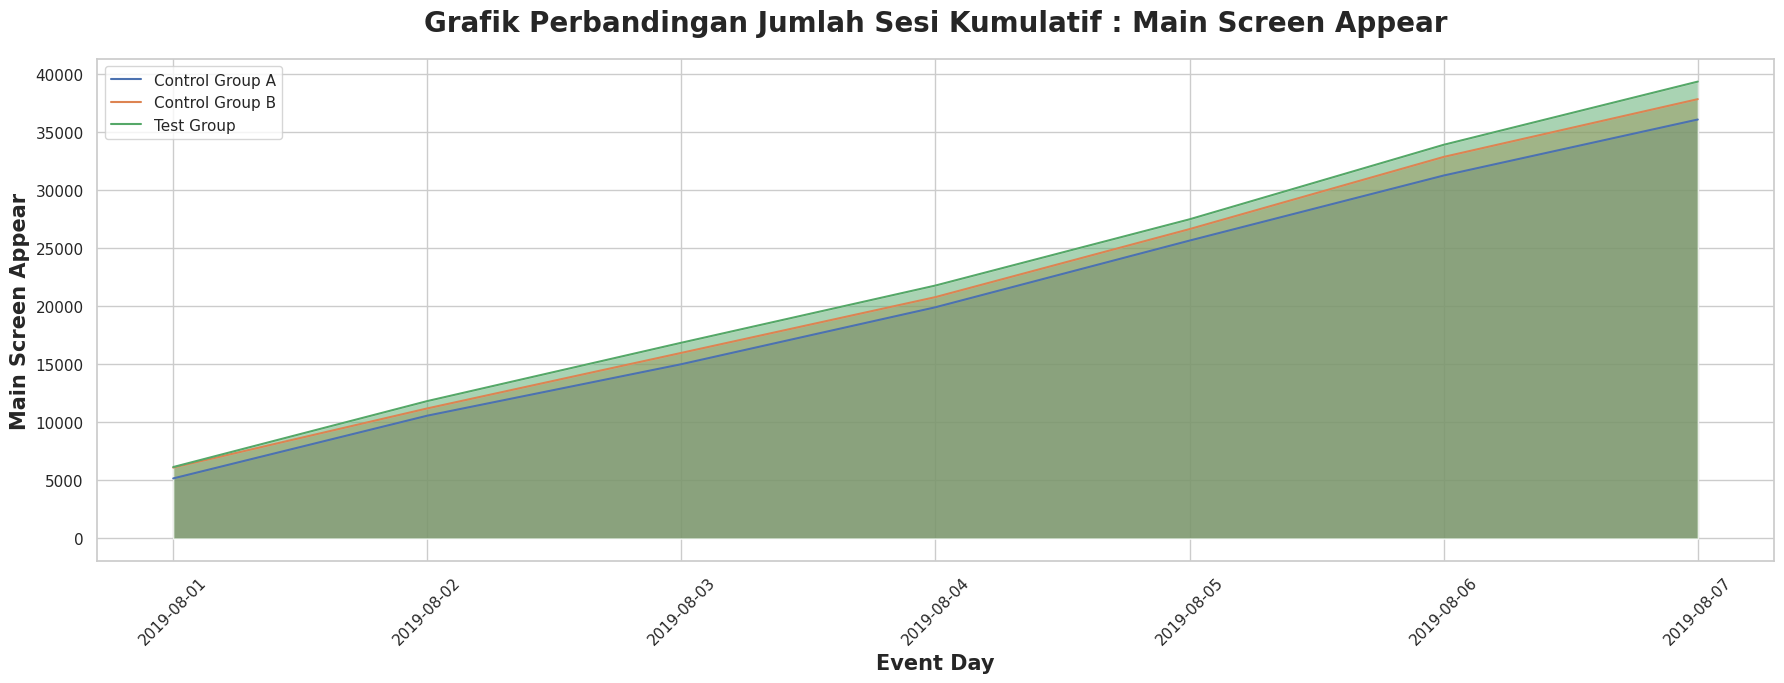

In [71]:
# Visualisasi "Perbandingan Kuantitas sesi pengguna kumulatif di Halaman Utama untuk seluruh Kelompok Eksperimen"
create_area_chart('Main Screen Appear', 'Grafik Perbandingan Jumlah Sesi Kumulatif : Main Screen Appear', figsize=(18, 7))

Grafik menunjukkan bahwa **tidak ada perbedaan** yang signifikan dalam jumlah sesi pengguna yang masuk ke Halaman Utama antara semua kelompok eksperimen. Selanjutnya, untuk mengidentifikasi perbedaan antar satu kelompok eksperimen terhadap kelompok eksperimen lain, kami akan menggunakan **Grafik Perbedaan Relatif**.

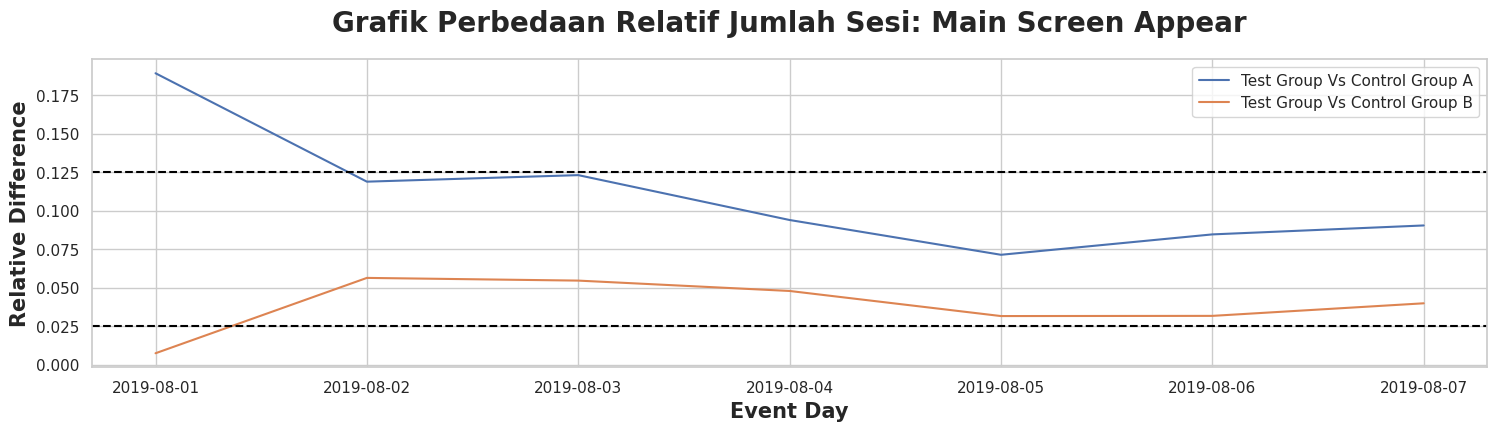

In [72]:
# memvisualisaikan grafik perbedaan relatif dari sesi pengguna yang masuk ke halaman utama aplikasi
graph_difference_relative('Main Screen Appear', 0.125, 0.025)

Data kami menunjukkan bahwa **tidak ada perbedaan** yang signifikan dalam pola tren grafik antara Control Group A dan Control Group B relatif terhadap Test Group. Selama periode analisis, kenaikan jumlah sesi oleh pengguna di halaman utama terlihat serupa di antara kelompok-kelompok tersebut.

Selanjutnya kami akan menggunakan *mannmannwhitneyu test* untuk membuktikannya secara statistik

In [73]:
# uji statistik perbedaan antar kelompok eksperimen
mannwhitneyu_test('Main Screen Appear')

p_value: 0.62
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Control Group B
Perbedaan Relatif antara 2 kelompok sebesar: 0.049

p_value: 0.13
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: 0.090

p_value: 0.53
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group B vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: 0.040


**Kesimpulan:**

* Kami membuktikan bahwa secara visual dan statistik **tidak terdapat** perbedaan jumlah sesi yang dilakukan oleh pengguna dalam mengakses halaman utama aplikasi
* Rata-rata jumlah sesi pengunjung yang mengakses halaman utama untuk Kelompok Uji adalah **9.0% lebih tinggi dari Kelompok Kontrol A** dan **4.0% lebih tinggi dibandingkan Kelompok Kontrol B**

#### **Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Offers Screen Appear**

Dalam konteks ini, kita akan menggunakan uji perbedaan statistik untuk menganalisis perbedaan yang signifikan antara total sesi pengguna dalam kelompok eksperimen dari sesi Offers Screen Appear pada aplikasi. Sesi Offers Screen Appear merujuk pada waktu ketika pengguna melihat tawaran atau penawaran khusus di aplikasi tersebut. Tujuan kita adalah untuk mengetahui apakah terdapat perbedaan yang signifikan dalam jumlah sesi pengguna sebelum dan setelah tim web designer mengubah font secara keseluruhan

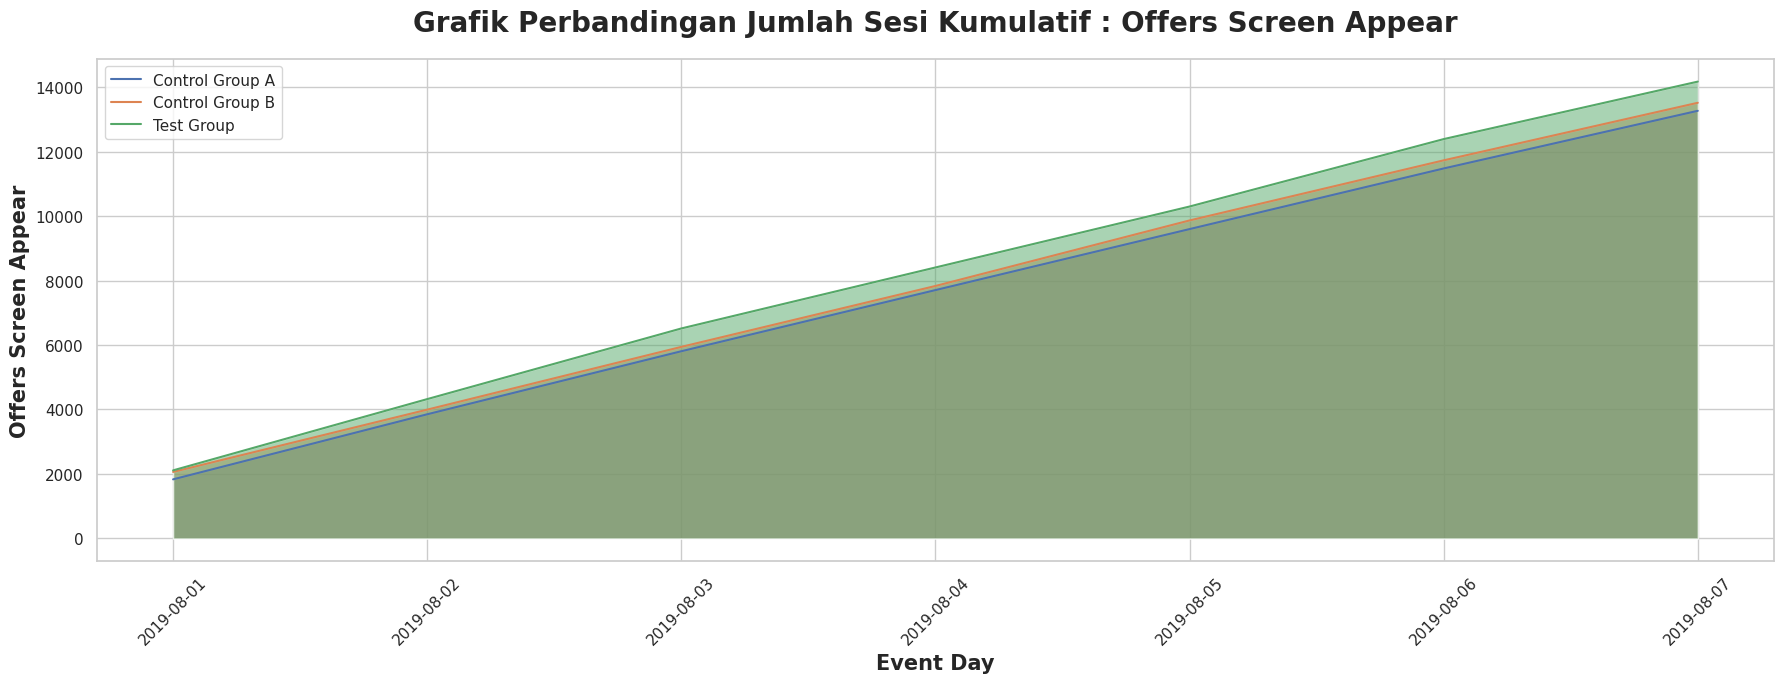

In [74]:
# Visualisasi "Perbandingan Kuantitas sesi pengguna kumulatif di Halaman Penawaran Produk untuk seluruh Kelompok Eksperimen"
create_area_chart('Offers Screen Appear', 'Grafik Perbandingan Jumlah Sesi Kumulatif : Offers Screen Appear', figsize=(18, 7))

Secara kumulatif, grafik menunjukkan **tidak terdapat perbedaan** yang signifikan dari jumlah sesi pengguna yang masuk ke halaman penawaran produk

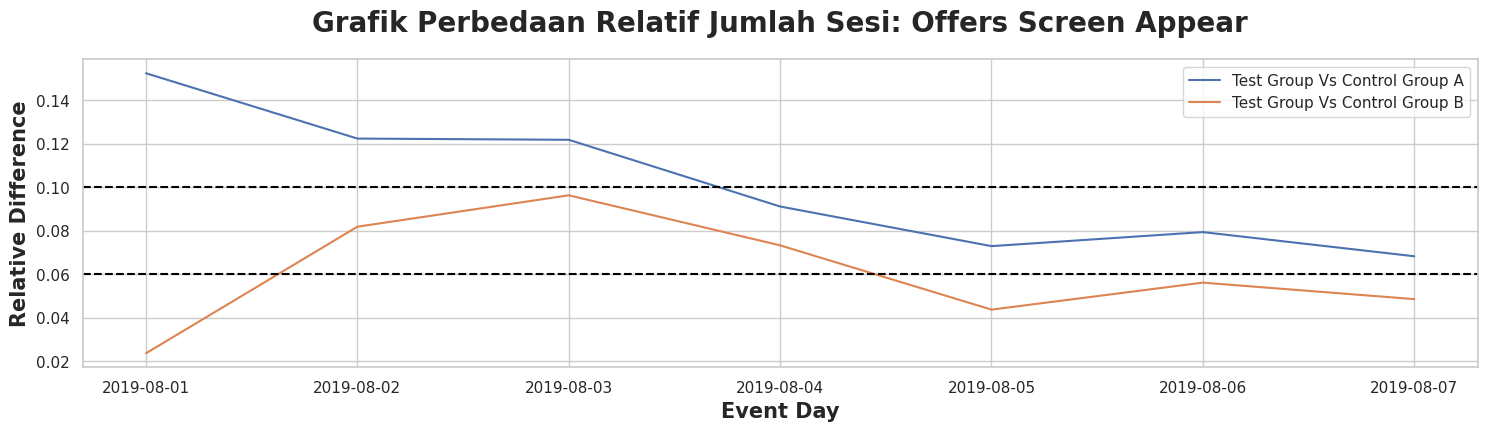

In [75]:
# memvisualisaikan grafik perbedaan relatif dari sesi pengguna yang masuk ke halaman penawaran produk
graph_difference_relative('Offers Screen Appear', 0.10, 0.06)

Grafik Perbedaan Relatif dari 2 kelompok pengguna aplikasi dengan font lama relatif terhadap kelompok pengguna aplikasi dengan font baru menunjukkan pola **penurunan persentase relatif** selama periode 02-08-2019 hingga 07-08-201. Hal ini mengindikasikan bahwa total jumlah sesi kumulatif oleh pengguna yang masuk ke halaman penawaran produk dengan font baru cenderung menurun dibandingkan dengan total sesi kumulatif di halaman yang sama dengan font lama.

Disisi lain, kami mengamati bahwa pola fluktuasi dari kedua kelompok kontrol terhadap kelompok uji **cenderung serupa** selama periode analisa. Kami akan kembali membuktikannya secara statistik menggunakan *mannmannwhitneyu test*

In [76]:
# uji statistik perbedaan antar kelompok eksperimen
mannwhitneyu_test('Offers Screen Appear')

p_value: 0.62
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Control Group B
Perbedaan Relatif antara 2 kelompok sebesar: 0.019

p_value: 0.26
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: 0.068

p_value: 0.26
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group B vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: 0.049


**Kesimpulan :**

* Kami membuktikan tidak terdapat perbedaan antara ke-2 kelompok kontrol (pengguna di aplikasi dengan font lama)
* Tidak terdapat perbedaan visual maupun statistik dalam jumlah sesi pengguna yang beralih dari halaman utama ke halaman penawaran produk antara kelompok pengguna di aplikasi dengan font lama dan kelompok pengguna aplikasi dengan font baru selama periode analisis
* Rata-rata jumlah sesi pengunjung yang mengakses halaman penawaran produk untuk Kelompok Uji adalah **6,8% lebih tinggi dari Kelompok Kontrol A** dan **4.9% lebih tinggi dibandingkan Kelompok Kontrol B**

#### **Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Cart Screen Appear**

Pengujian statistik ini akan menentukan apakah terdapat perbedaan signifikan dalam jumlah sesi pengguna yang masuk ke Cart Screen (halaman keranjang belanja) antara dua kelompok pengguna aplikasi dengan font lama dan satu kelompok pengguna aplikasi dengan font baru. Pengujian statistik akan digunakan untuk menguji hipotesis apakah terdapat perbedaan yang signifikan antara kelompok-kelompok tersebut dalam hal jumlah sesi yang diarahkan ke Cart Screen. Hasil pengujian akan membantu dalam menentukan apakah perubahan font baru berdampak pada perilaku pengguna terkait halaman keranjang belanja

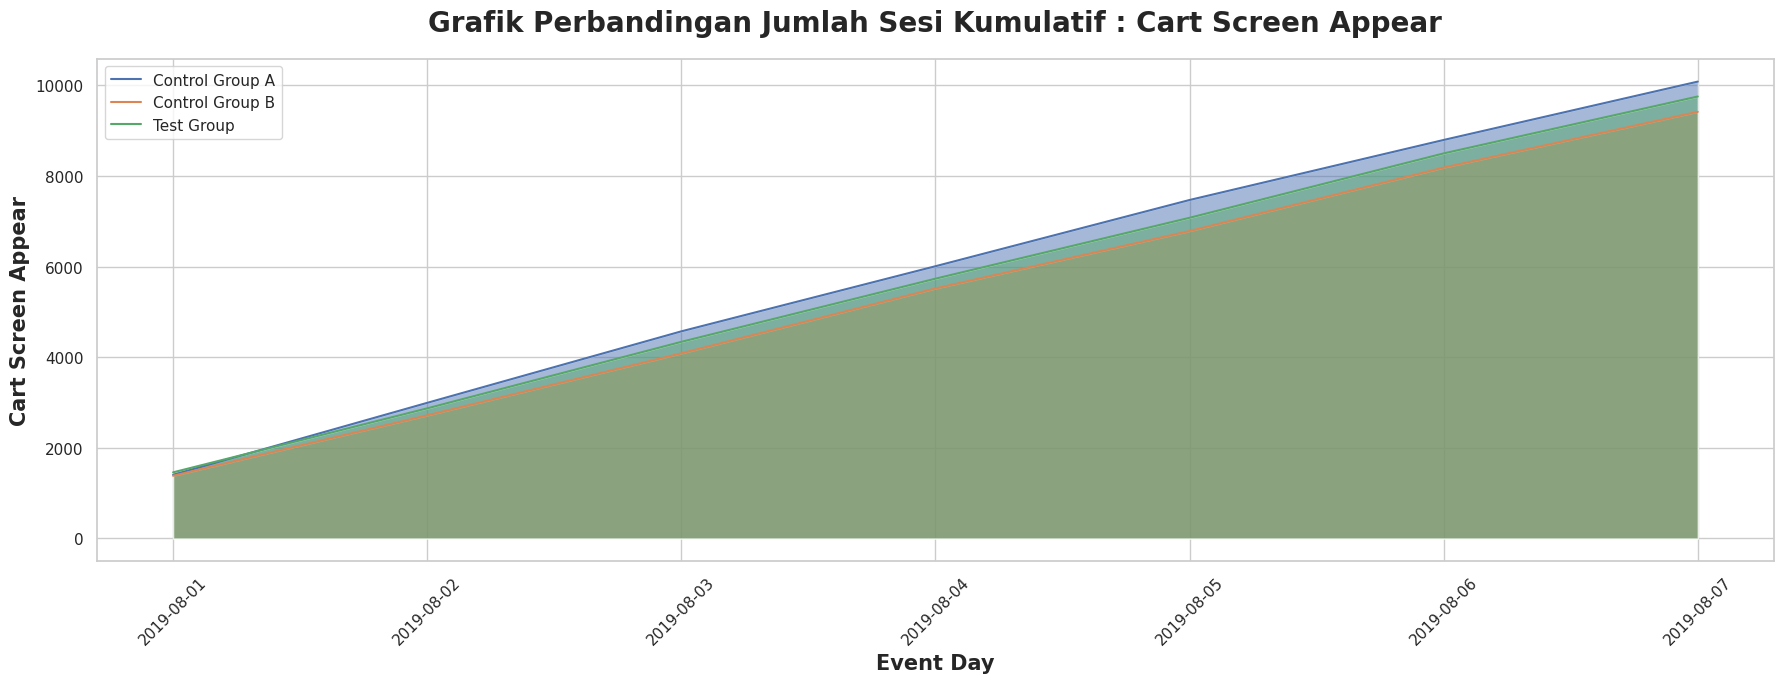

In [77]:
# Visualisasi "Perbandingan Kuantitas sesi pengguna kumulatif di Halaman Keranjang Belanja untuk seluruh Kelompok Eksperimen"
create_area_chart('Cart Screen Appear', 'Grafik Perbandingan Jumlah Sesi Kumulatif : Cart Screen Appear', figsize=(18, 7))

Secara visual **tidak terdapat perbedaan** dari total jumlah sesi pengguna kumulatif yang beranjak dari halaman penawaran produk ke halaman keranjang belanja untuk seluruh kelompok eksperimen

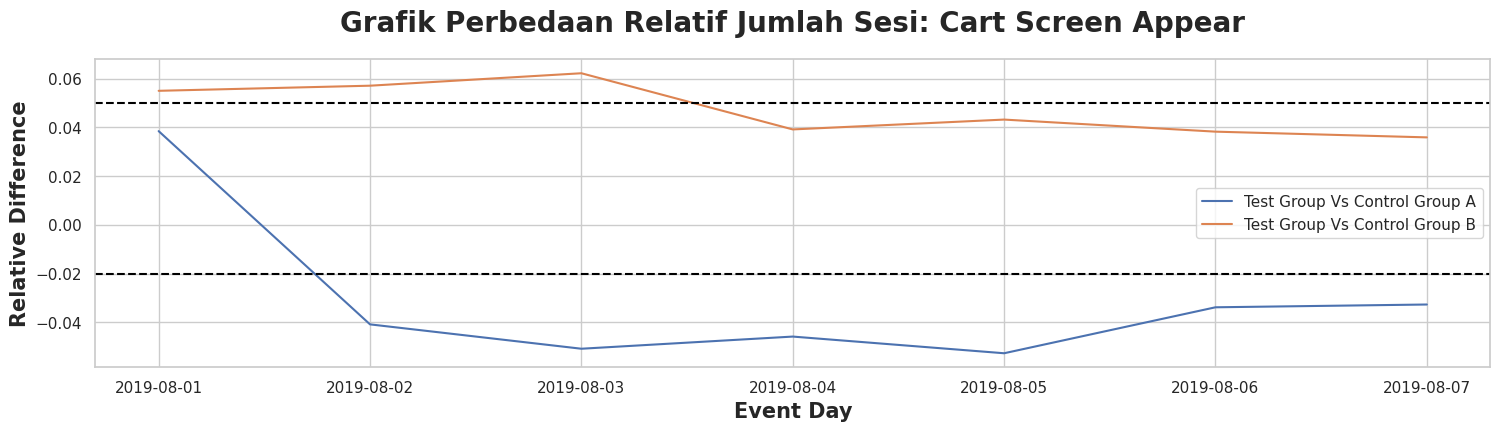

In [78]:
# memvisualisaikan grafik perbedaan relatif dari sesi pengguna yang masuk ke halaman penawaran produk
graph_difference_relative('Cart Screen Appear', 0.05, -0.02)

Grafik perbedaan relatif antara kedua kelompok kontrol terhadap kelompok uji menunjukkan **fluktuasi yang berlawanan**. Setiap kenaikan dan penurunan trend dari kedua kelompok cenderung **tidak searah**. Meskipun begitu, secara persentase, kami menemukan bahwa jumlah total sesi pengunjung yang mengakses halaman keranjang belanja dari kedua kelompok kontrol lambat laun menjadi **lebih besar** dibandingkan dengan jumlah sesi pengunjung dari kelompok uji selama periode analisa. Hal ini mengakibatkan sebagian persentase bahkan **bernilai negatif**

In [79]:
# uji statistik perbedaan antar kelompok eksperimen
mannwhitneyu_test('Cart Screen Appear')

p_value: 0.1
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Control Group B
Perbedaan Relatif antara 2 kelompok sebesar: -0.066

p_value: 0.53
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: -0.033

p_value: 0.21
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group B vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: 0.036


**Kesimpulan :**

* Berdasarkan data statistik kami, **tidak ada perbedaan** yang signifikan antara jumlah total sesi pengunjung yang mengakses halaman keranjang belanja antara kelompok pengunjung yang menggunakan font web lama dan kelompok pengunjung yang menggunakan font web yang baru
* Rata-rata jumlah sesi pengunjung yang mengakses halaman keranjang belanja untuk Kelompok Uji adalah **3,3% lebih rendah dari Kelompok Kontrol A** namun **3.6% lebih tinggi dibandingkan Kelompok Kontrol B**

#### **Uji Perbedaan Statistik Untuk Total Sesi Pengguna : Payment Screen Successful**

Dalam analisis ini, akan dilakukan uji perbedaan statistik untuk membandingkan total sesi pengguna yang berhasil masuk ke halaman pembayaran ("payment screen successful") antara dua kelompok pengguna aplikasi dengan font lama dan satu kelompok pengguna aplikasi dengan font baru. Uji ini bertujuan untuk mengetahui apakah terdapat perbedaan signifikan dalam tingkat keberhasilan masuk ke halaman pembayaran antara kelompok pengguna dengan font lama dan kelompok pengguna dengan font baru

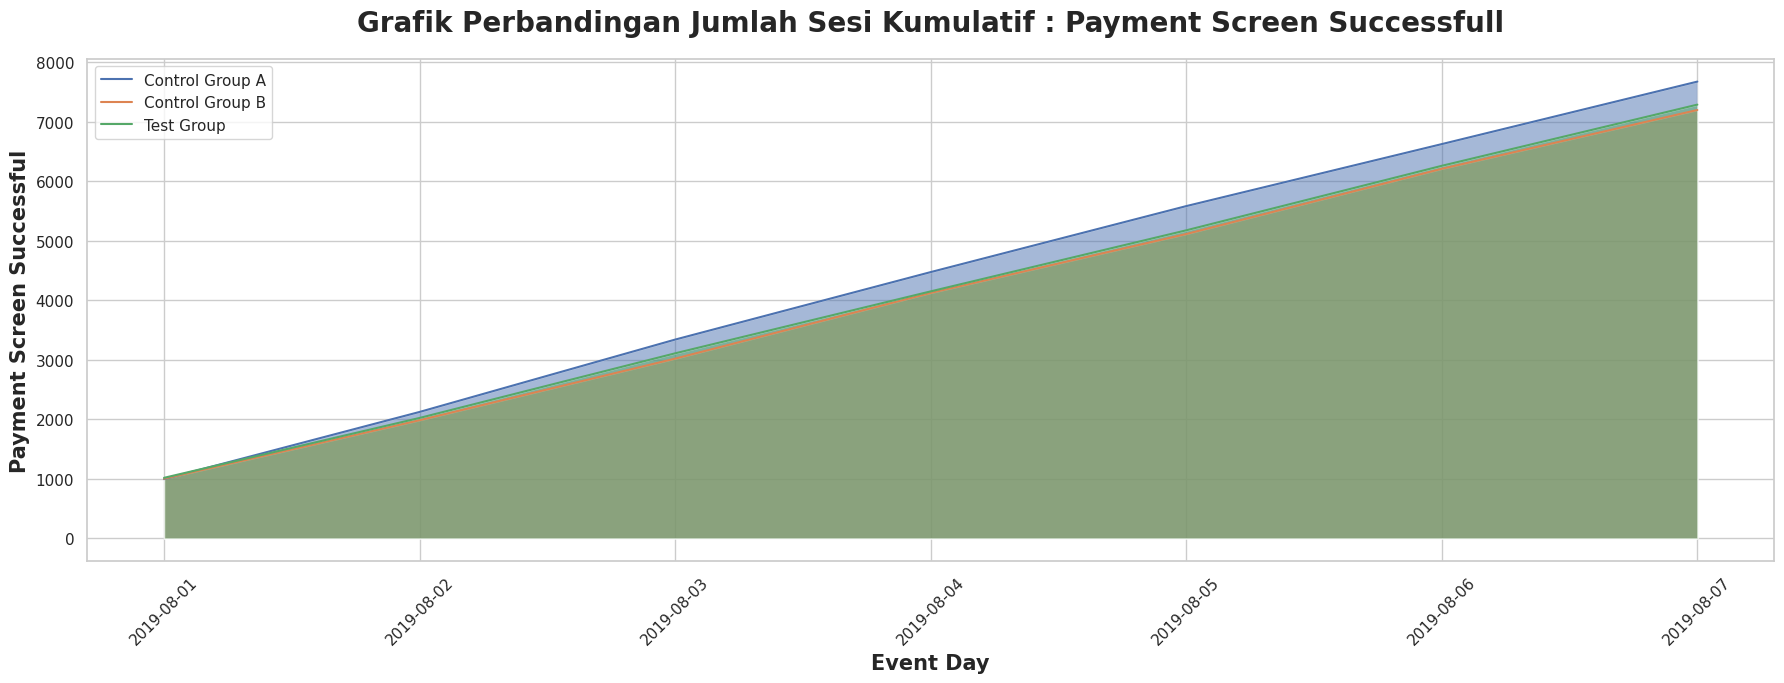

In [80]:
# Visualisasi "Perbandingan Kuantitas sesi pengguna kumulatif di Halaman Pembayaran untuk seluruh Kelompok Eksperimen"
create_area_chart('Payment Screen Successful', 'Grafik Perbandingan Jumlah Sesi Kumulatif : Payment Screen Successfull', figsize=(18, 7))

Secara visual, total jumlah sesi pengunjung (kumulatif) yang memutuskan melakukan pembelian di web untuk seluruh kelompok eksperimen **tidak menunjukkan perbedaan**, dimana nilai kumulatif dari ketiga kelompok berada pada kisaran angka 7.000 - 7.500 sesi

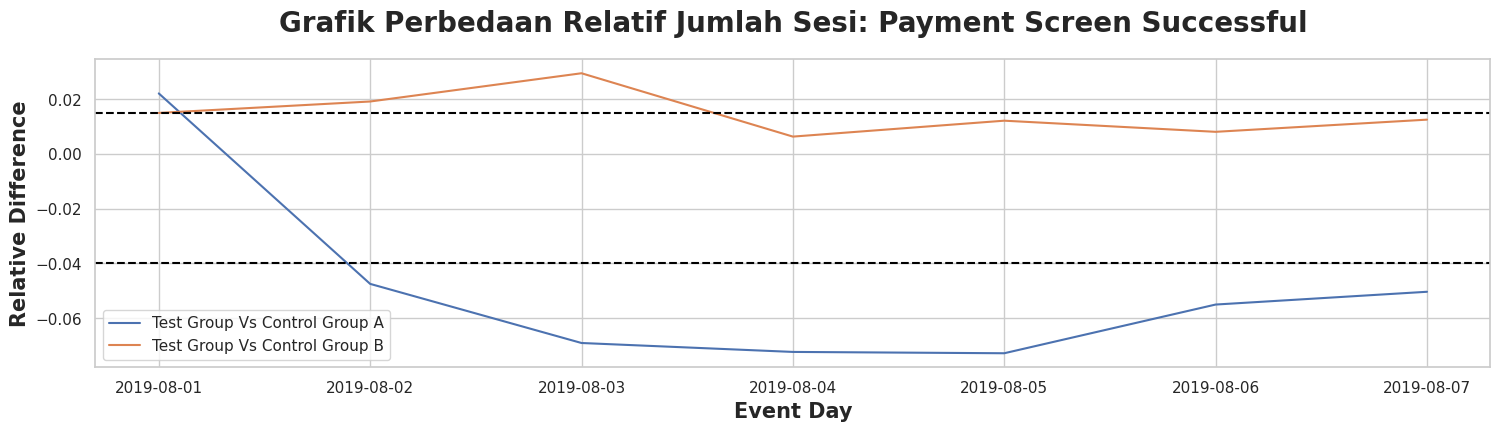

In [81]:
# memvisualisaikan grafik perbedaan relatif dari sesi pengguna yang masuk ke halaman pembayaran
graph_difference_relative('Payment Screen Successful', 0.015, -0.04)

Grafik menunjukkan bahwa jumlah sesi pengguna yang mengakses halaman pembayaran antara kelompok uji, relatif terhadap kedua kelompok kontrol berfluktuasi selama periode analisa. Selain kenaikan dan penurunan trend dari kedua chart yang terlihat **tidak seragam**, secara persentase kami juga melihat bahwa fluktuasi jumlah sesi penguuna dari satu kelompok kontrol cenderung **lebih stabil** (Control Group A VS Test Group) dibandingkan fluktuasi jumlah sesi pengguna dari kelompok kontrol lain (Control Group B VS Test Group). **Untuk itu, kami akan membuktikannya secara statistik dan membuat kesimpulan**

In [82]:
# uji statistik perbedaan antar kelompok eksperimen
mannwhitneyu_test('Payment Screen Successful')

p_value: 0.04
Tolak Hipotesis Null: Terdapat perbedaan signifikan antara Control Group A vs Control Group B
Perbedaan Relatif antara 2 kelompok sebesar: -0.062

p_value: 0.1
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: -0.050

p_value: 0.46
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group B vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: 0.013


**Kesimpulan :**

* Hasil A/A Testing menggunakan uji *manwhitneyu* menunjukkan adanya perbedaan signifikan antara kedua kelompok kontrol (kelompok pengguna web dengan font lama) yang mengindikasikan bahwa pengujian A/A tidak berhasil pada corong ini
* Rata-rata jumlah sesi pengunjung yang mengakses halaman pembayaran untuk Kelompok Uji adalah **5,0% lebih rendah dari Kelompok Kontrol A** namun **1.3% lebih tinggi dibandingkan Kelompok Kontrol B**

#### **Uji Perbedaan Statistik : Tingkat Konversi Pembelian**


Dalam analisis ini, kami akan menguji perbedaan statistik untuk tingkat konversi antara dua tahap utama dalam proses pembelian produk. Tahap pertama adalah "Main Screen Appear" di mana pengguna mengakses halaman utama, dan tahap kedua adalah "Payment Screen Successful" di mana pengguna berhasil menyelesaikan pembayaran. Tingkat konversi diukur sebagai rasio antara jumlah pembayaran yang berhasil dan jumlah pengguna yang muncul pada halaman utama

In [83]:
# menghitung tingkat konversi dan menambahkan kolom baru ke dataframe "pivot_user_event"

pivot_user_event['Conversion Rate'] = round(pivot_user_event['Payment Screen Successful'] / pivot_user_event['Main Screen Appear'],2)
pivot_user_event

,event_day,experiment_code,Cart Screen Appear,Main Screen Appear,Offers Screen Appear,Payment Screen Successful,Tutorial,Conversion Rate
0,2019-08-01,Control Group A,1404,5167,1832,996,54,0.19
1,2019-08-01,Control Group B,1382,6099,2062,1003,80,0.16
2,2019-08-01,Test Group,1458,6145,2111,1018,83,0.17
3,2019-08-02,Control Group A,1588,5404,2019,1129,61,0.21
4,2019-08-02,Control Group B,1333,5097,1933,983,43,0.19
5,2019-08-02,Test Group,1412,5683,2211,1006,56,0.18
6,2019-08-03,Control Group A,1578,4435,1956,1216,48,0.27
7,2019-08-03,Control Group B,1369,4784,1947,1035,55,0.22
8,2019-08-03,Test Group,1468,5026,2192,1086,57,0.22
9,2019-08-04,Control Group A,1437,4904,1897,1134,41,0.23


In [84]:
# menghitung tingkat konversi kumulatif dan menambahkan kolom baru ke dataframe "cumsum_user_event"

cumsum_user_event ['Conversion Rate'] = round(cumsum_user_event['Payment Screen Successful'] / cumsum_user_event['Main Screen Appear'],2)
cumsum_user_event

,event_day,experiment_code,Cart Screen Appear,Main Screen Appear,Offers Screen Appear,Payment Screen Successful,Tutorial,Total_Session,Conversion Rate
0,2019-08-01,Control Group A,1404,5167,1832,996,54,9453,0.19
1,2019-08-01,Control Group B,1382,6099,2062,1003,80,10626,0.16
2,2019-08-01,Test Group,1458,6145,2111,1018,83,10815,0.17
3,2019-08-02,Control Group A,2992,10571,3851,2125,115,19654,0.20
4,2019-08-02,Control Group B,2715,11196,3995,1986,123,20015,0.18
5,2019-08-02,Test Group,2870,11828,4322,2024,139,21183,0.17
6,2019-08-03,Control Group A,4570,15006,5807,3341,163,28887,0.22
7,2019-08-03,Control Group B,4084,15980,5942,3021,178,29205,0.19
8,2019-08-03,Test Group,4338,16854,6514,3110,196,31012,0.18
9,2019-08-04,Control Group A,6007,19910,7704,4475,204,38300,0.22


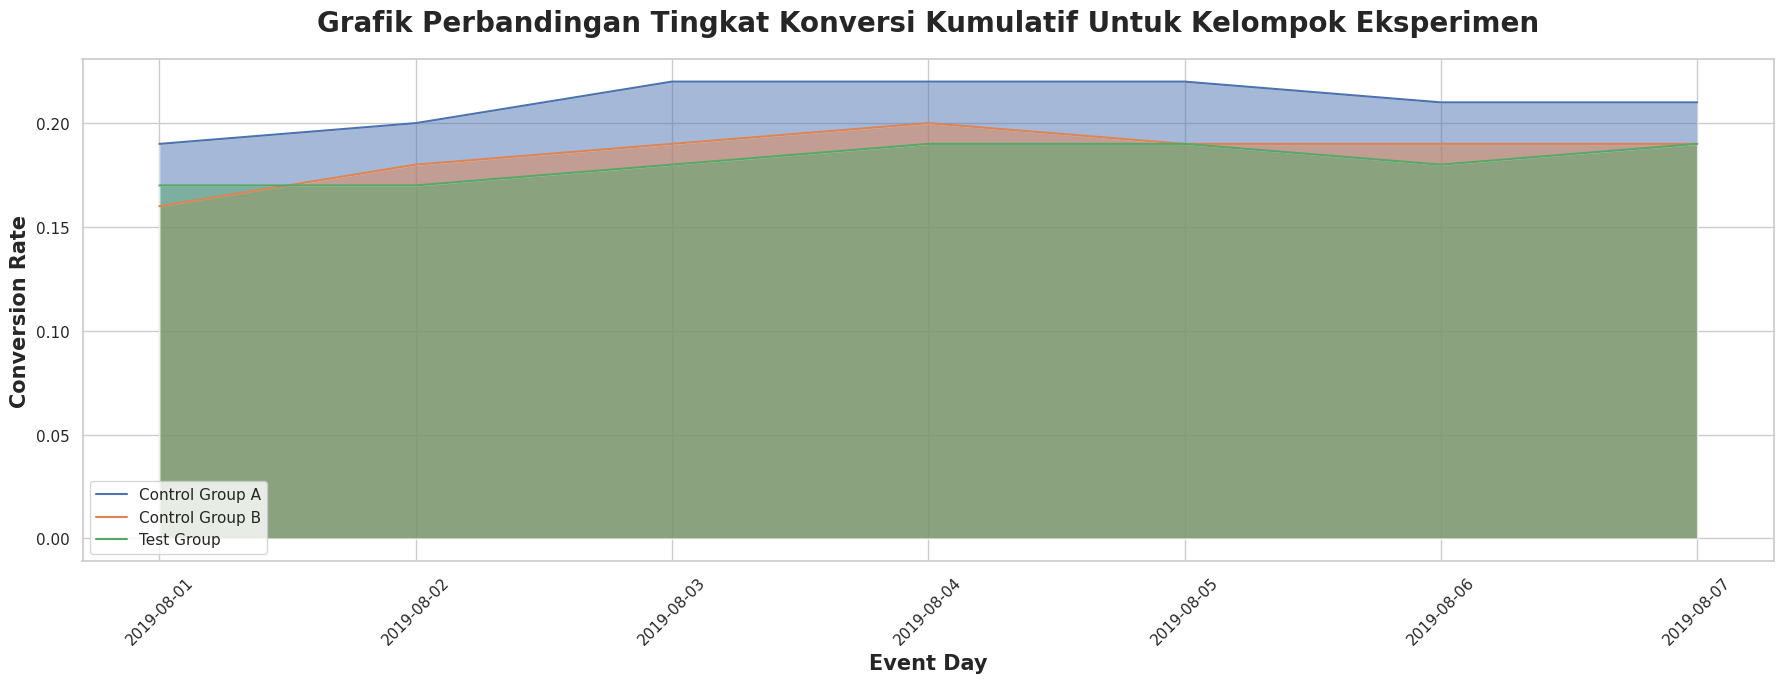

In [85]:
# Visualisasi "Perbandingan Tingkat Konversi Kumulatif untuk seluruh Kelompok Eksperimen"
create_area_chart('Conversion Rate', 'Grafik Perbandingan Tingkat Konversi Kumulatif Untuk Kelompok Eksperimen', figsize=(18, 7))

Grafik menunjukkan bahwa **Kelompok Kontrol A** memiliki tingkat konversi kumulatif yang sedikit **lebih tinggi** dibandingkan dengan tingkat konversi kelompok eksperimen lain. Namun secara trend kami mengamati **pola yang stabil** dari ketiga kelompok eksperimen

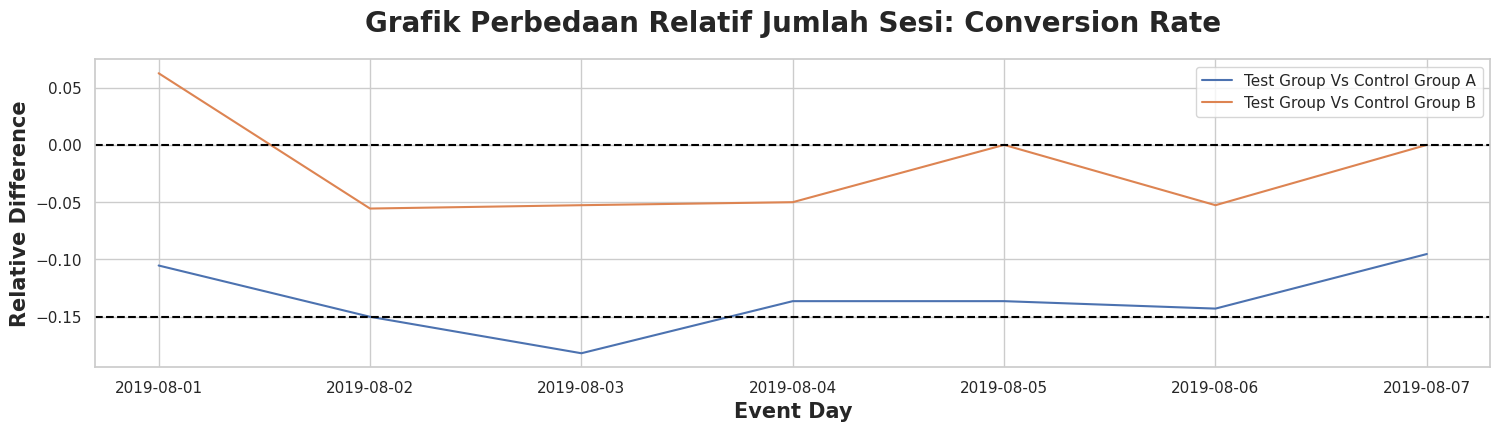

In [86]:
# memvisualisaikan grafik perbedaan relatif dari tingkat konversi kumulatif
graph_difference_relative('Conversion Rate', 0.0, -0.15)

Tingkat konversi kumulatif **Kelompok Kontrol** secara konsiten **lebih tinggi** dibandingkan tingkat konversi kumulatif **Kelompok Uji** selama periode 01-08-2019 hingga 07-08-2019. Hal ini dapat menjadi indikasi awal yang menunjukkan bahwa pengguna aplikasi dengan font baru tampaknya **lebih jarang** dalam melakukan konversi pembelian dibandingkan kelompok pengguna pada aplikasi lama

In [87]:
# uji statistik perbedaan tingkat konversi antar kelompok eksperimen
mannwhitneyu_test('Conversion Rate')

p_value: 0.22
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Control Group B
Perbedaan Relatif antara 2 kelompok sebesar: -0.100

p_value: 0.06
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group A vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: -0.120

p_value: 0.8
Terima Hipotesis Null: Tidak terdapat perbedaan antara Control Group B vs Test Group
Perbedaan Relatif antara 2 kelompok sebesar: -0.022


**Kesimpulan :**

* Secara statistik tidak terdapat perbedaan tingkat konversi dari kelompok pengguna aplikasi dengan font baru terhadap kelompok pengguna aplikasi lama
* Rata-rata tingkat konversi untuk Kelompok Uji adalah 2.2% lebih rendah dibandingkan Kelompok Kontrol B dan 12% lebih rendah dibandingkan Kelompok Kontrol B, yang memperkuat bukti bahwa tingkat konversi pengguna aplikasi yang baru secara konsisten memang lebih rendah dibandingkan pengguna aplikasi model font lama

# **Kesimpulan Umum**

Dataset yang kami peroleh mencakup periode selama 13 hari, dimulai dari tanggal 25 Juli 2019 hingga 07 Agustus 2019. Setelah melakukan seluruh rangkaian proses Pembersihan Data, kami mendapatkan 243.713 baris data (atau 243.713 peristiwa tercatat di situs web). Namun, kami perlu memperhatikan pola distribusi jumlah peristiwa yang tercatat untuk setiap pengguna di aplikasi web perusahaan. Beberapa pengguna mungkin mengalami masalah teknis yang dapat memengaruhi distribusi data secara keseluruhan. Terlihat bahwa ketika kami memperpanjang periode analisis, distribusi jumlah peristiwa dari semua pengguna menjadi tidak merata. Oleh karena itu, kami membatasi periode analisis hanya selama periode 01 Agustus 2019 hingga 07 Agustus 2019 (selama 7 hari) dengan mempertimbangkan distribusi data yang lebih baik. Dalam tahap tersebut, jumlah baris data yang kami gunakan menyusut sebesar 1.2% (dari 243.713 menjadi 240.887), sementara jumlah pengguna yang terlacak mengalami penurunan sebesar 0.23% (dari 7.551 menjadi 7.534).

Selain itu, kami juga berhasil mengidentifikasi outlier pada distribusi jumlah peristiwa tercatat untuk setiap pengguna di situs web. Dalam pengamatan selama 7 hari, 99% pengguna mencatatkan tidak lebih dari total 201 peristiwa. Namun, kami menemukan seorang pengguna dengan jumlah sesi yang tidak wajar, yaitu sebanyak 2.307 sesi tercatat di web atau sekitar 330 sesi per hari. Dengan pertimbangan tersebut, kami memutuskan untuk hanya menggunakan 99% data yang paling relevan dan terbebas dari outlier, yang masih memuat lebih dari 85% karakteristik data.

Analisis yang kami lakukan terhadap pengalaman pengguna di situs web menunjukkan bahwa :
1. Dari 114.000 sesi pengguna di halaman utama, hanya sekitar 36% yang menjelajahi penawaran produk. Dalam 36% itu, lebih dari 70% menambahkan barang ke keranjang. Akhirnya, sekitar 76% sesi berhasil melakukan pembelian. Secara keseluruhan, hanya sekitar 20% dari semua sesi pengguna yang berakhir dengan pembelian.
2. Dari 7.344 pengguna yang mengunjungi halaman utama, 62% pengguna (4.517) melanjutkan ke laman penawaran produk, 50% pengguna melanjutkan ke laman keranjang, dan hanya 47% yang menyelesaikan pembayaran. Terdapat hambatan atau masalah yang menghalangi pengguna dalam proses pembayaran.
3. Secara komprehensif, data menunjukkan bahwa perusahaan mengalami penurunan signifikan dalam jumlah pengguna yang beralih dari **Halaman Utama** ke **Halaman Penawaran** dengan persentase sebesar **40%**

Setelah menganalisis perbandingan jumlah sesi pengguna dan tingkat konversi antara kelompok pengguna yang menggunakan aplikasi dengan font baru dan kelompok pengguna yang menggunakan aplikasi dengan font lama, kami menemukan beberapa temuan sebagai berikut:
* Secara keseluruhan, tidak ada perbedaan signifikan dalam jumlah sesi pengguna di setiap tahapan funnel maupun tingkat konversi antara kedua kelompok pengguna. Artinya, pengguna dengan font baru dan font lama memiliki tingkat partisipasi dan konversi yang relatif sama
* Terdapat peningkatan sebesar 5% - 9% dalam jumlah sesi pengguna yang mengakses halaman utama hingga halaman penawaran produk untuk kelompok pengguna dengan font baru dibandingkan kelompok pengguna dengan font lama. Ini menunjukkan bahwa pengguna dengan font baru cenderung lebih tertarik atau lebih mungkin untuk melanjutkan ke tahap penawaran produk setelah mengakses halaman utama
* Namun, terjadi pula penurunan persentase tingkat partisipasi pengguna untuk pengguna dengan aplikasi yang menggunakan font baru, terutama pada tahapan funnel dari Cart Screen Appear hingga Payment Screen Successful. Penurunan ini berdampak pada tingkat konversi yang rendah untuk pengguna aplikasi dengan font baru, yang secara konsisten menunjukkan persentase relatif yang negatif dibandingkan dengan pengguna aplikasi dengan font lama

Dengan demikian, meskipun terdapat peningkatan jumlah sesi pengguna dalam kelompok dengan font baru pada tahap awal, penurunan persentase partisipasi dan tingkat konversi menunjukkan bahwa perubahan font baru mungkin memiliki dampak negatif terhadap pengguna dalam memproses transaksi atau melakukan pembelian.